# Import Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from pathlib import Path

In [4]:
# set width of Jupyter notebook
from IPython.core.display import HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# set some visual properties of displaying pandas DataFrame
pd.options.display.max_columns=200
pd.options.display.max_rows=200

# Load data


In [5]:
# Load data - set index column, decimal point, separator
data = pd.read_csv("C:/Users/ondra/Documents/Data science 2/data-science-2/HW 1/2024_DS2_HW1_data_train.csv", sep = ',', decimal = '.', index_col = 'Booking_ID')

data_predict = pd.read_csv("C:/Users/ondra/Documents/Data science 2/data-science-2/HW 1/2024_DS2_HW1_data_test.csv", sep = ',', decimal = '.', index_col = 'Booking_ID')


# print time of data being loaded - use strftime
print(f'Data loaded on:   {datetime.datetime.now().strftime(format="%Y-%m-%d %H:%M:%S")}')

Data loaded on:   2024-04-17 16:34:57


In [6]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN10204,NaN,NaN,NaN,2.0,Meal Plan 2,NaN,Room_Type 6,NaN,2018.0,9.0,NaN,Online,0.0,0.0,NaN,NaN,1.0,0.0
INN20020,NaN,NaN,NaN,2.0,Meal Plan 1,NaN,NaN,NaN,NaN,12.0,NaN,Online,0.0,0.0,0.0,NaN,NaN,0.0
INN16435,1.0,NaN,NaN,2.0,NaN,0.0,Room_Type 1,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,0.0
INN07143,3.0,NaN,NaN,3.0,NaN,NaN,NaN,100.0,2018.0,5.0,NaN,Online,0.0,0.0,NaN,NaN,2.0,0.0
INN20511,1.0,0.0,1.0,1.0,Meal Plan 1,0.0,NaN,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,0.0,150.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN16851,2.0,NaN,NaN,NaN,Meal Plan 1,NaN,NaN,43.0,2017.0,12.0,26.0,Offline,NaN,0.0,0.0,NaN,2.0,0.0
INN06266,1.0,NaN,NaN,2.0,Meal Plan 2,0.0,Room_Type 1,102.0,2017.0,10.0,NaN,Online,NaN,0.0,NaN,80.0,NaN,1.0
INN11285,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2018.0,5.0,NaN,Corporate,0.0,0.0,0.0,NaN,1.0,0.0


In [7]:
# Print some numbers about data sample size
print(f'Number of rows:   {data.shape[0]:,}'.replace(',', ' '))
print(f'Number of unique indexes:   {data.index.nunique():,}'.replace(',', ' '))
print(f'Number of columns:   {data.shape[1]:,}'.replace(',', ' '))

Number of rows:   32 647
Number of unique indexes:   32 647
Number of columns:   18


In [8]:
#name of the target column
data.rename(columns={'booking_status': 'TARGET'}, inplace=True)
col_target = "TARGET" 

#name of the month column
col_month = "arrival_month"


In [9]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,TARGET
Booking_ID,,,,,,,,,,,,,,,,,,
INN10204,NaN,NaN,NaN,2.0,Meal Plan 2,NaN,Room_Type 6,NaN,2018.0,9.0,NaN,Online,0.0,0.0,NaN,NaN,1.0,0.0
INN20020,NaN,NaN,NaN,2.0,Meal Plan 1,NaN,NaN,NaN,NaN,12.0,NaN,Online,0.0,0.0,0.0,NaN,NaN,0.0
INN16435,1.0,NaN,NaN,2.0,NaN,0.0,Room_Type 1,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,0.0
INN07143,3.0,NaN,NaN,3.0,NaN,NaN,NaN,100.0,2018.0,5.0,NaN,Online,0.0,0.0,NaN,NaN,2.0,0.0
INN20511,1.0,0.0,1.0,1.0,Meal Plan 1,0.0,NaN,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,0.0,150.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN16851,2.0,NaN,NaN,NaN,Meal Plan 1,NaN,NaN,43.0,2017.0,12.0,26.0,Offline,NaN,0.0,0.0,NaN,2.0,0.0
INN06266,1.0,NaN,NaN,2.0,Meal Plan 2,0.0,Room_Type 1,102.0,2017.0,10.0,NaN,Online,NaN,0.0,NaN,80.0,NaN,1.0
INN11285,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2018.0,5.0,NaN,Corporate,0.0,0.0,0.0,NaN,1.0,0.0


In [10]:
# check values in column TARGET
data.TARGET.value_counts(dropna=False)

TARGET
0.0    21774
1.0    10521
NaN      352
Name: count, dtype: int64

In [11]:
data = data.dropna(subset = ["TARGET"])

In [12]:
data.TARGET.value_counts(dropna=False)

TARGET
0.0    21774
1.0    10521
Name: count, dtype: int64

In [13]:
# define list of predictors
cols_pred = list(data.columns[0:17])

# define list of numerical predictors
cols_pred_num = [col for col in cols_pred if data[col].dtype != 'O']
# define list of categorical predictors
cols_pred_cat = [col for col in cols_pred if data[col].dtype == 'O']

print('Numerical predictors:')
print('---------------------')
print(data[cols_pred_num].dtypes)
print()
print('Categorical predictors:')
print('-----------------------')
print(data[cols_pred_cat].dtypes)

Numerical predictors:
---------------------
no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
required_car_parking_space              float64
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
repeated_guest                          float64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
dtype: object

Categorical predictors:
-----------------------
type_of_meal_plan      object
room_type_reserved     object
market_segment_type    object
dtype: object


In [14]:
print(len(cols_pred_num))
print(len(cols_pred_cat))

14
3


# Data Split

In [15]:
print(f'Maximal year: {max(data["arrival_year"])}')
print(f'Minimal year: {min(data["arrival_year"])}')
print(f'Number of observations in  2017: {data["arrival_year"].value_counts().get(2017.0, 0)}')
print(f'Number of observations in 2018: {data["arrival_year"].value_counts().get(2018.0, 0)}')


Maximal year: 2018.0
Minimal year: 2017.0
Number of observations in  2017: 5266
Number of observations in 2018: 24064


In [16]:
data.arrival_month.value_counts(dropna=False)

arrival_month
10.0    4613
9.0     3995
8.0     3284
6.0     2795
12.0    2586
11.0    2562
7.0     2553
4.0     2376
5.0     2261
3.0     2019
2.0     1486
NaN      896
1.0      869
Name: count, dtype: int64

In [17]:
data.arrival_year.value_counts(dropna=False)

arrival_year
2018.0    24064
2017.0     5266
NaN        2965
Name: count, dtype: int64

We do not use stratiffication, because we have 896 NA for month and 2965 for year and we do not want to lose these observations. 

In [18]:
data['sample'] = 'default'

# use train_test_split to split the data into train and rest (don't forget seed)
data_train, data_rest = train_test_split(data, test_size=0.4, random_state = 12)
data.loc[data_train.index, 'sample'] = 'train'
# use train_test_split to split the rest into valid and test (don't forget seed)
data_valid, data_test = train_test_split(data_rest, test_size=0.5, random_state = 12)
data.loc[data_valid.index, 'sample'] = 'valid'
data.loc[data_test.index, 'sample'] = 'test'

C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1686120672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sample'] = 'default'


In [19]:
# define function to plot default rate in time for different samples
def default_rate_in_time_per_sample(dt, col_target, col_month, col_sample):
    # group by over month and sample
    dt_grp = dt.groupby([col_month, col_sample]).agg(
        def_rt = (col_target, 'mean')
    ).reset_index()
    
    # pivot sample values to columns
    dt_grp_pivot = dt_grp.pivot(index = col_month, columns = col_sample, values = 'def_rt')

    # plot default rate in time
    lines = plt.plot(range(len(dt_grp_pivot)), dt_grp_pivot, marker = 'o')
    plt.xticks(range(len(dt_grp_pivot)), dt_grp_pivot.index, rotation = 90)
    # set legend
    plt.legend(iter(lines), tuple(dt_grp_pivot.columns), loc='best', bbox_to_anchor=(1.05, 1))
    
    plt.ylim([0, 1])
    plt.ylabel('default rate', loc='top')
    plt.xlabel('month', loc='right')
    
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.tick_params(axis='y', colors='gray')
    ax.tick_params(axis='x', colors='gray') 
    
    plt.show()

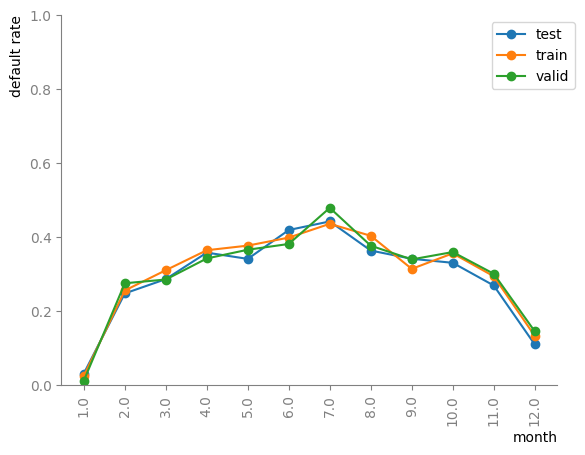

In [20]:
default_rate_in_time_per_sample(data, col_target, col_month, 'sample')

In [21]:
# define sample masks
train_mask = (data['sample'] == 'train')
valid_mask = (data['sample'] == 'valid') 
test_mask = (data['sample'] == 'test') 

# Data preprocessing

In [22]:
# find columns with infinity values
cols_with_inf = []
for col in cols_pred_num:
    if np.any(np.isinf(data[col])):
        cols_with_inf.append(col)
        print(f'Column {col} includes infinity values.')

# find columns with negative infinity values
cols_with_neginf = []
for col in cols_pred_num:
    if np.any(np.isneginf(data[col])):
        cols_with_neginf.append(col)
        print(f'Column {col} includes negative infinity values.')

In [23]:
# replace infinity values
for col in cols_with_inf:
    data[col] = data[col].replace(np.inf, 9999999)

for col in cols_with_neginf:
    data[col] = data[col].replace(np.inf, -9999999)

In [24]:
# remove columns with too many NAN's
nan_columns=data.columns[(data.isnull().sum(axis=0)/len(data))>0.98]
cols_pred=[col for col in cols_pred if col not in nan_columns]

In [25]:
# remove columns with one unique value
unique_columns=data.columns[data.nunique()==1]
cols_pred=[col for col in cols_pred if col not in unique_columns]

In [26]:
len(cols_pred)

17

# Encode Categorical Predictors


In [27]:
def mean_target_encoding(dt, predictor, target, alpha = 0.01):
    total_cnt = len(dt)
    total_dr = np.mean(dt[target])
    dt_grp = dt.groupby(predictor).agg(
        categ_dr = (target, 'mean'),
        categ_cnt = (target, len)
    )
    
    dt_grp['categ_freq'] = dt_grp['categ_cnt'] / total_cnt
    dt_grp['categ_encoding'] = (dt_grp['categ_freq'] * dt_grp['categ_dr'] + alpha * total_dr) / (dt_grp['categ_freq'] + alpha)
    
    return dt_grp[['categ_encoding']].to_dict()['categ_encoding']

In [28]:
total_dr = np.mean(data[train_mask][col_target])

# encode categorical predictors
for pred in tqdm(cols_pred_cat):
    if len(data[pred].unique()) < 0:
        dummies = pd.get_dummies(
            data[pred], 
            prefix = pred,
            prefix_sep = '_',
            dummy_na = True if data[pred].isnull().sum() > 0 else False,
            drop_first = False
        )
        
        for d in dummies.columns:
            if d in data.columns:
                del data[d]
                
        data = data.join(dummies)
        
        for col in dummies.columns:
            if col not in cols_pred:
                cols_pred.append(col)
        
        if pred in cols_pred:
            cols_pred.remove(pred)
    else:
        new_vals = mean_target_encoding(
            dt=data[train_mask], 
            predictor=pred, 
            target=col_target
        )

        additional_values = set(data[data[pred].notnull()][pred].unique()) - set(new_vals.keys())
        for p in additional_values:
            new_vals[p] = total_dr

        data['MTE_' + pred] = data[pred].map(new_vals)
        
        if 'MTE_' + pred not in cols_pred:
            cols_pred.append('MTE_' + pred)
        
        if pred in cols_pred:
            cols_pred.remove(pred)

  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\ondra\AppData\Local\Temp\ipykernel_272\2366410008.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MTE_' + pred] = data[pred].map(new_vals)
C:\Users\ondra\AppData\Local\Temp\ipykernel_272\2366410008.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MTE_' + pred] = data[pred].map(new_vals)
C:\Users\ondra\AppData\Local\Temp\ipykernel_272\2366410008.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [29]:
cols_pred

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'MTE_type_of_meal_plan',
 'MTE_room_type_reserved',
 'MTE_market_segment_type']

In [30]:
data.required_car_parking_space.value_counts(dropna=False)


required_car_parking_space
0.0    17077
NaN    14621
1.0      597
Name: count, dtype: int64

In [31]:
data.repeated_guest.value_counts(dropna=False)


repeated_guest
NaN    24715
0.0     7383
1.0      197
Name: count, dtype: int64

# XGBoost model

In [32]:
# set best parameters to be used in XGBoost
params = {    
    'max_depth': 4,
    
    'objective': 'binary:logistic',
    'eval_metric': ['auc'],
}

evals_result = {}
booster = xgb.train(
    params = params,
    dtrain = xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]),
    num_boost_round = 1000,
    evals = (
        (xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]), 'train'),
        (xgb.DMatrix(data[test_mask][cols_pred], data[test_mask][col_target]), 'test'),
        (xgb.DMatrix(data[valid_mask][cols_pred], data[valid_mask][col_target]), 'valid'),        
    ),
    evals_result = evals_result,
    early_stopping_rounds = 8
)

[0]	train-auc:0.70896	test-auc:0.71244	valid-auc:0.70086
[1]	train-auc:0.74298	test-auc:0.74382	valid-auc:0.73440
[2]	train-auc:0.75825	test-auc:0.75907	valid-auc:0.75413
[3]	train-auc:0.76795	test-auc:0.77046	valid-auc:0.76318
[4]	train-auc:0.77516	test-auc:0.77692	valid-auc:0.76882
[5]	train-auc:0.78349	test-auc:0.78528	valid-auc:0.77789
[6]	train-auc:0.78574	test-auc:0.78728	valid-auc:0.77990
[7]	train-auc:0.78985	test-auc:0.79130	valid-auc:0.78316
[8]	train-auc:0.79269	test-auc:0.79336	valid-auc:0.78575
[9]	train-auc:0.79447	test-auc:0.79498	valid-auc:0.78778
[10]	train-auc:0.79750	test-auc:0.79663	valid-auc:0.79025
[11]	train-auc:0.79762	test-auc:0.79673	valid-auc:0.79081
[12]	train-auc:0.79944	test-auc:0.79802	valid-auc:0.79232
[13]	train-auc:0.80143	test-auc:0.79915	valid-auc:0.79384
[14]	train-auc:0.80237	test-auc:0.80022	valid-auc:0.79477
[15]	train-auc:0.80329	test-auc:0.80071	valid-auc:0.79550
[16]	train-auc:0.80405	test-auc:0.80099	valid-auc:0.79581
[17]	train-auc:0.80519	t

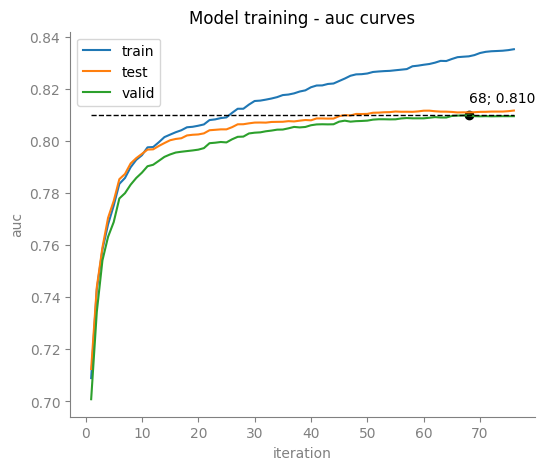

In [33]:
metric = 'auc'

fig = plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1)
total_iteration_count = len(evals_result[list(evals_result.keys())[0]][metric])
for sample, vals in evals_result.items():
    ax.plot(
        range(1, total_iteration_count + 1), 
        vals[metric],
        label=sample
    )

best_score = booster.best_score
best_iteration = booster.best_iteration+1

ax.plot([1, total_iteration_count], [best_score, best_score], color='black', ls='--', lw=1)
ax.scatter([best_iteration], [best_score], color = 'black')
ax.annotate(
    '{:d}; {:0.3f}'.format(best_iteration, best_score), 
    xy = (best_iteration, best_score), 
    xytext = (best_iteration,best_score+0.005),
)
ax.set_xlabel('iteration', color='gray')
ax.set_ylabel(metric, color='gray')
ax.legend(loc='best')
ax.set_title(f'Model training - {metric} curves')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

# plt.savefig('test.svg', format='svg')
# plt.close()

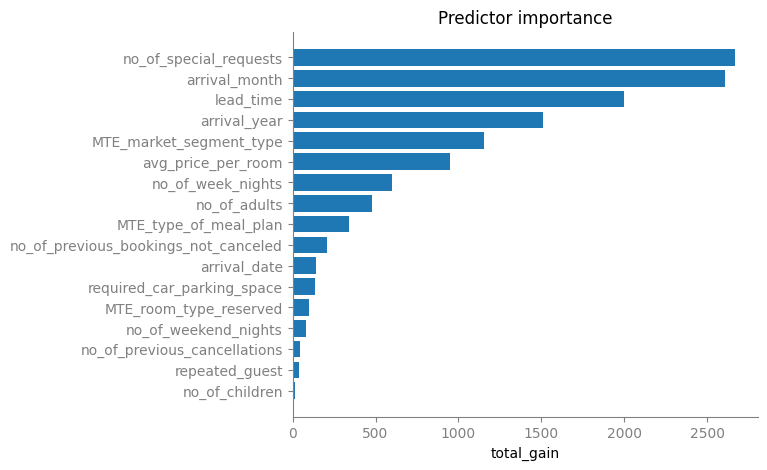

In [34]:
importance_type = 'total_gain'

predictor_strength = sorted([(k, v) for k,v in booster.get_score(importance_type = importance_type).items()], key = lambda x: x[1], reverse = True)
predictor_strength = pd.DataFrame(predictor_strength, columns = ['predictor', 'strength'])

fig = plt.figure(figsize=(6,5))

n_strongest = 17
plt.barh(range(n_strongest, 0, -1), predictor_strength['strength'].iloc[0:20])
plt.yticks(range(n_strongest, 0, -1), predictor_strength['predictor'].iloc[0:20])
plt.xlabel(importance_type)
plt.title('Predictor importance')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

plt.show()

## XGBoost in sklearn

In [35]:
booster_sklearn = xgb.XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    random_state=12,
    verbosity=1,
    eval_metric='auc',
    use_label_encoder=False,
    early_stopping_rounds=10,
)

booster_sklearn.fit(
    data[train_mask][cols_pred].values, 
    data[train_mask][col_target].astype(int).values,
    eval_set=[
        (data[train_mask][cols_pred].values, data[train_mask][col_target].values),
        (data[test_mask][cols_pred].values, data[test_mask][col_target].values),
        (data[valid_mask][cols_pred].values, data[valid_mask][col_target].values),
    ],
    verbose=True,
)

[0]	validation_0-auc:0.75533	validation_1-auc:0.75971	validation_2-auc:0.74696
[1]	validation_0-auc:0.77571	validation_1-auc:0.77279	validation_2-auc:0.76644
[2]	validation_0-auc:0.78522	validation_1-auc:0.78015	validation_2-auc:0.77605
[3]	validation_0-auc:0.78980	validation_1-auc:0.78418	validation_2-auc:0.77833
[4]	validation_0-auc:0.79962	validation_1-auc:0.79262	validation_2-auc:0.78682
[5]	validation_0-auc:0.80282	validation_1-auc:0.79481	validation_2-auc:0.78939
[6]	validation_0-auc:0.80481	validation_1-auc:0.79667	validation_2-auc:0.79193
[7]	validation_0-auc:0.81011	validation_1-auc:0.80134	validation_2-auc:0.79579
[8]	validation_0-auc:0.81493	validation_1-auc:0.80348	validation_2-auc:0.79984
[9]	validation_0-auc:0.81595	validation_1-auc:0.80412	validation_2-auc:0.80091
[10]	validation_0-auc:0.81699	validation_1-auc:0.80486	validation_2-auc:0.80160
[11]	validation_0-auc:0.82035	validation_1-auc:0.80779	validation_2-auc:0.80555
[12]	validation_0-auc:0.82185	validation_1-auc:0.8

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=12, ...)

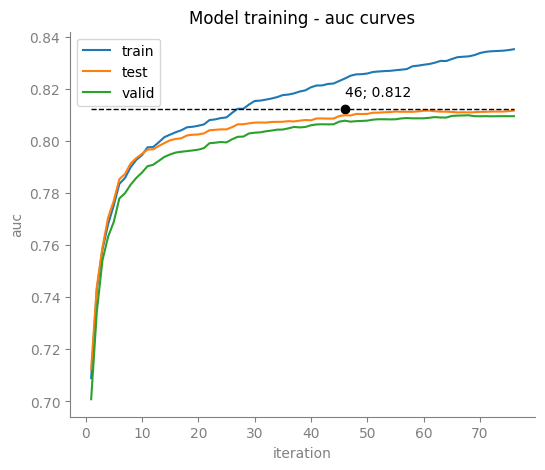

In [36]:
metric = 'auc'

fig = plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1)
total_iteration_count = len(evals_result[list(evals_result.keys())[0]][metric])
for sample, vals in evals_result.items():
    ax.plot(
        range(1, total_iteration_count + 1), 
        vals[metric],
        label=sample
    )

best_score = booster_sklearn.best_score
best_iteration = booster_sklearn.best_iteration+1

ax.plot([1, total_iteration_count], [best_score, best_score], color='black', ls='--', lw=1)
ax.scatter([best_iteration], [best_score], color = 'black')
ax.annotate(
    '{:d}; {:0.3f}'.format(best_iteration, best_score), 
    xy = (best_iteration, best_score), 
    xytext = (best_iteration,best_score+0.005),
)
ax.set_xlabel('iteration', color='gray')
ax.set_ylabel(metric, color='gray')
ax.legend(loc='best')
ax.set_title(f'Model training - {metric} curves')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

# plt.savefig('test.svg', format='svg')
# plt.close()

In [37]:
params={
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,

    'eval_metric': 'auc',
    'objective': 'binary:logistic' ,
    'booster': 'gbtree',
    'tree_method': 'exact',

    'seed': 12
}

skf = StratifiedKFold(n_splits = 2, shuffle = True, random_state = 12)

X = data[cols_pred].values
y = data[col_target].values
data['cv_score'] = -1.0
cv_res = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    evals_result = {}
    booster = xgb.train(
        params = params,
        dtrain = xgb.DMatrix(X_train, y_train),
        num_boost_round = 1000,
        evals = (
            (xgb.DMatrix(X_train, y_train), 'train'),
            (xgb.DMatrix(X_test, y_test), 'test'),
        ),
        evals_result = evals_result,
        early_stopping_rounds = 10,
        verbose_eval = True
    )
    
    gini_train = 2 * roc_auc_score(y_train, booster.predict(xgb.DMatrix(X_train))) - 1 # to co nám to vyhazuje
    gini_test  = 2 * roc_auc_score(y_test,  booster.predict(xgb.DMatrix(X_test)))  - 1
    best_iteration = booster.best_iteration
    
    cv_res += [(gini_train, gini_test, best_iteration)]
    
    data.iloc[test_index, list(data.columns).index('cv_score')] = list(booster.predict(xgb.DMatrix(X_test), iteration_range=(0, booster.best_iteration)))

[0]	train-auc:0.68184	test-auc:0.68659
[1]	train-auc:0.69771	test-auc:0.69836
[2]	train-auc:0.73741	test-auc:0.73900
[3]	train-auc:0.73544	test-auc:0.73710
[4]	train-auc:0.74288	test-auc:0.74366
[5]	train-auc:0.75457	test-auc:0.75406
[6]	train-auc:0.75583	test-auc:0.75519
[7]	train-auc:0.76316	test-auc:0.76119
[8]	train-auc:0.76842	test-auc:0.76640
[9]	train-auc:0.76824	test-auc:0.76558
[10]	train-auc:0.76977	test-auc:0.76705


C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1244316071.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cv_score'] = -1.0


[11]	train-auc:0.76959	test-auc:0.76586
[12]	train-auc:0.76939	test-auc:0.76579
[13]	train-auc:0.77136	test-auc:0.76810
[14]	train-auc:0.77275	test-auc:0.76952
[15]	train-auc:0.77463	test-auc:0.77130
[16]	train-auc:0.77664	test-auc:0.77294
[17]	train-auc:0.77668	test-auc:0.77322
[18]	train-auc:0.77782	test-auc:0.77448
[19]	train-auc:0.77702	test-auc:0.77346
[20]	train-auc:0.77758	test-auc:0.77358
[21]	train-auc:0.77722	test-auc:0.77368
[22]	train-auc:0.77834	test-auc:0.77490
[23]	train-auc:0.78109	test-auc:0.77732
[24]	train-auc:0.78122	test-auc:0.77764
[25]	train-auc:0.78300	test-auc:0.77923
[26]	train-auc:0.78394	test-auc:0.78031
[27]	train-auc:0.78499	test-auc:0.78132
[28]	train-auc:0.78632	test-auc:0.78223
[29]	train-auc:0.78727	test-auc:0.78285
[30]	train-auc:0.78783	test-auc:0.78364
[31]	train-auc:0.78798	test-auc:0.78346
[32]	train-auc:0.78822	test-auc:0.78379
[33]	train-auc:0.78907	test-auc:0.78456
[34]	train-auc:0.78958	test-auc:0.78485
[35]	train-auc:0.78988	test-auc:0.78468


In [38]:
# Performance during cross validation
cv_res # nejlepší gini a v jakým je řádku

[(0.655230607823682, 0.6092168818884154, 245),
 (0.6745235005339973, 0.6113830252776449, 357)]

In [39]:
gini_cv = 2 * roc_auc_score(data[col_target], data['cv_score']) - 1
print(f'Cross validation score performance: {gini_cv:.4f}')

Cross validation score performance: 0.6104


In [40]:
# Final model
params = {    
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,

    'eval_metric': 'auc',
    'objective': 'binary:logistic' ,
    'booster': 'gbtree',
    'tree_method': 'exact',

    'seed': 12
}

evals_result = {}
booster = xgb.train(
    params = params,
    dtrain = xgb.DMatrix(data[cols_pred], data[col_target]),
    evals = (
        (xgb.DMatrix(data[cols_pred], data[col_target]), 'train'),
    ),
    num_boost_round = 130,
    evals_result = evals_result
)

[0]	train-auc:0.68319
[1]	train-auc:0.72357
[2]	train-auc:0.74129
[3]	train-auc:0.73985
[4]	train-auc:0.74000
[5]	train-auc:0.73952
[6]	train-auc:0.74883
[7]	train-auc:0.76306
[8]	train-auc:0.76642
[9]	train-auc:0.76719
[10]	train-auc:0.76662
[11]	train-auc:0.76586
[12]	train-auc:0.76781
[13]	train-auc:0.77193
[14]	train-auc:0.77365
[15]	train-auc:0.77449
[16]	train-auc:0.77552
[17]	train-auc:0.77617
[18]	train-auc:0.77730
[19]	train-auc:0.77785
[20]	train-auc:0.77764
[21]	train-auc:0.77875
[22]	train-auc:0.77916
[23]	train-auc:0.78006
[24]	train-auc:0.78030
[25]	train-auc:0.78166
[26]	train-auc:0.78196
[27]	train-auc:0.78270
[28]	train-auc:0.78319
[29]	train-auc:0.78370
[30]	train-auc:0.78443
[31]	train-auc:0.78447
[32]	train-auc:0.78507
[33]	train-auc:0.78587
[34]	train-auc:0.78686
[35]	train-auc:0.78739
[36]	train-auc:0.78786
[37]	train-auc:0.78890
[38]	train-auc:0.78924
[39]	train-auc:0.78980
[40]	train-auc:0.79017
[41]	train-auc:0.79105
[42]	train-auc:0.79139
[43]	train-auc:0.7921

In [41]:
gini_train = 2 * roc_auc_score(data[col_target], booster.predict(xgb.DMatrix(data[cols_pred]))) - 1
print(gini_train)

0.6129288309793652


### Final model using splitted data

In [42]:
# Final model
params = {    
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,

    'eval_metric': ['logloss', 'auc'],
    'objective': 'binary:logistic' ,
    'booster': 'gbtree',
    'tree_method': 'exact',

    'seed': 12,
}

evals_result = {}
booster = xgb.train(
    params = params,
    dtrain = xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]),
    num_boost_round = 300,
    evals = (
        (xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]), 'train'),
        (xgb.DMatrix(data[test_mask][cols_pred],  data[test_mask][col_target]), 'test'),
        (xgb.DMatrix(data[valid_mask][cols_pred], data[valid_mask][col_target]), 'valid')
    ),
    evals_result = evals_result,
    early_stopping_rounds = 10,
    verbose_eval = True
)

[0]	train-logloss:0.62365	train-auc:0.68364	test-logloss:0.61659	test-auc:0.68987	valid-logloss:0.62327	valid-auc:0.67527
[1]	train-logloss:0.61621	train-auc:0.72491	test-logloss:0.60942	test-auc:0.72860	valid-logloss:0.61594	valid-auc:0.72095
[2]	train-logloss:0.61131	train-auc:0.73056	test-logloss:0.60486	test-auc:0.73324	valid-logloss:0.61124	valid-auc:0.72576
[3]	train-logloss:0.60817	train-auc:0.73631	test-logloss:0.60204	test-auc:0.73572	valid-logloss:0.60823	valid-auc:0.73163
[4]	train-logloss:0.60147	train-auc:0.74482	test-logloss:0.59540	test-auc:0.74324	valid-logloss:0.60204	valid-auc:0.73804
[5]	train-logloss:0.59376	train-auc:0.75702	test-logloss:0.58771	test-auc:0.75672	valid-logloss:0.59473	valid-auc:0.74955
[6]	train-logloss:0.58760	train-auc:0.76212	test-logloss:0.58147	test-auc:0.76122	valid-logloss:0.58853	valid-auc:0.75542
[7]	train-logloss:0.58563	train-auc:0.76899	test-logloss:0.57929	test-auc:0.77036	valid-logloss:0.58653	valid-auc:0.76297
[8]	train-logloss:0.5826

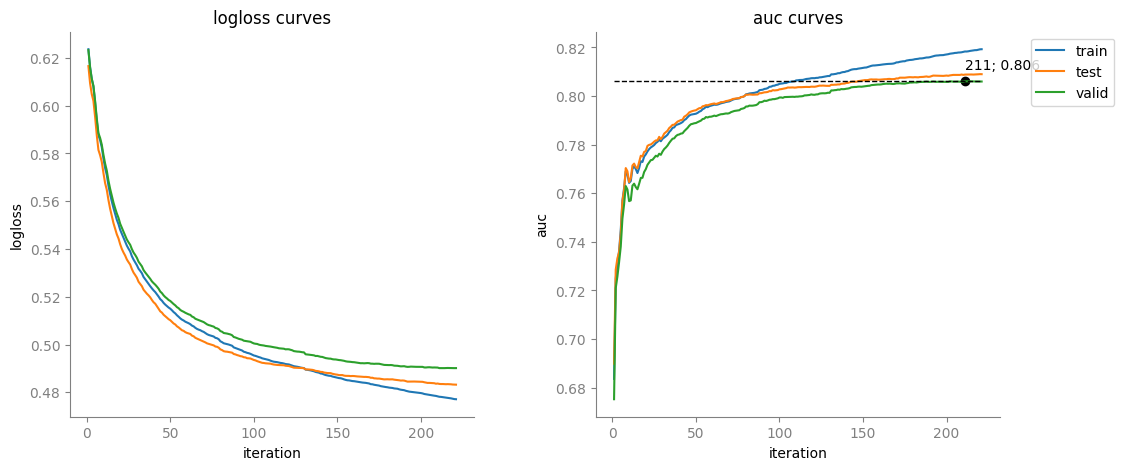

In [43]:
metric = 'logloss'

fig, axs = plt.subplots(1,2, figsize = (12,5))
plt.subplots_adjust(wspace=0.3)

total_iteration_count = len(evals_result[list(evals_result.keys())[0]][metric])
for sample, vals in evals_result.items():
    axs[0].plot(
        range(1, total_iteration_count + 1), 
        vals[metric],
        label=sample
    )

    
for sample, vals in evals_result.items():
    axs[1].plot(
        range(1, total_iteration_count + 1), 
        vals['auc'],
        label=sample
    )

best_score = booster.best_score
best_iteration = booster.best_iteration+1

plt.plot([1, total_iteration_count], [best_score, best_score], color='black', ls='--', lw=1)
plt.scatter([best_iteration], [best_score], color = 'black')
plt.annotate(
    '{:d}; {:0.3f}'.format(best_iteration, best_score), 
    xy = (best_iteration, best_score), 
    xytext = (best_iteration,best_score+0.005),
#     textcoords = 'offset points'
)

axs[0].set_xlabel('iteration')
axs[0].set_ylabel('logloss')
axs[0].set_title(f'logloss curves')

axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['left'].set_color('gray')
axs[0].spines['bottom'].set_color('gray')
axs[0].tick_params(axis='y', colors='gray')
axs[0].tick_params(axis='x', colors='gray')

axs[1].set_xlabel('iteration')
axs[1].set_ylabel('auc')
axs[1].set_title(f'auc curves')

axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_color('gray')
axs[1].spines['bottom'].set_color('gray')
axs[1].tick_params(axis='y', colors='gray')
axs[1].tick_params(axis='x', colors='gray')

plt.legend(loc='upper right',  bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

plt.show()

# Applying monotone constraints

In [61]:
def marginal_dependence(data, predictor, bins, col_target):
    dt = data.copy()
    dt[predictor + 'bin'] = pd.qcut(dt[predictor], bins, duplicates='drop').copy()
    dt.groupby(predictor + 'bin').agg(
        def_rt=(col_target, np.mean),
    ).plot(figsize=(9, 6))

In [62]:
data.no_of_special_requests.value_counts(dropna=False)

no_of_special_requests
0.0    13498
1.0     7921
NaN     7363
2.0     2993
3.0      463
4.0       52
5.0        5
Name: count, dtype: int64

C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1072758491.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt.groupby(predictor + 'bin').agg(
C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1072758491.py:4: FutureWarning: The provided callable <function mean at 0x000001B00A2788B0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dt.groupby(predictor + 'bin').agg(


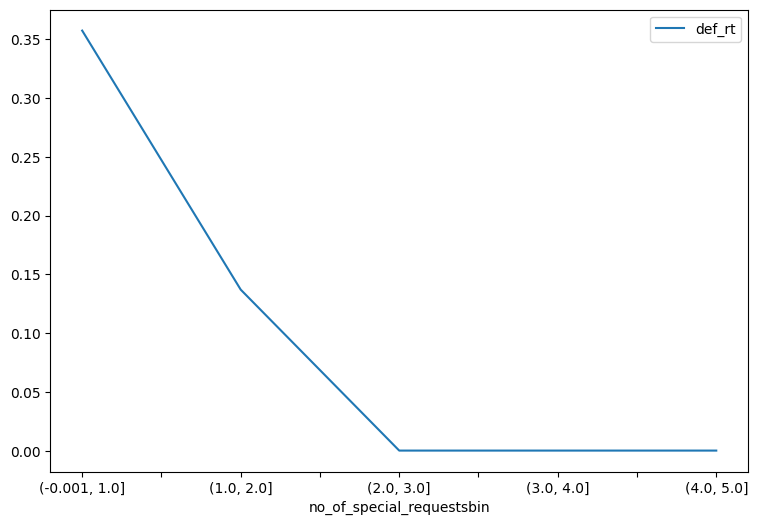

In [65]:
marginal_dependence(data,"no_of_special_requests",1000,col_target)

C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1072758491.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt.groupby(predictor + 'bin').agg(
C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1072758491.py:4: FutureWarning: The provided callable <function mean at 0x000001B00A2788B0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dt.groupby(predictor + 'bin').agg(
C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1072758491.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt.groupby

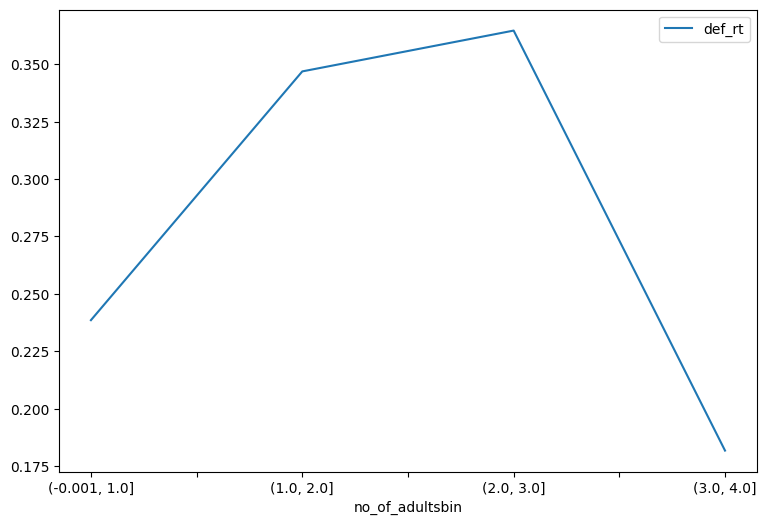

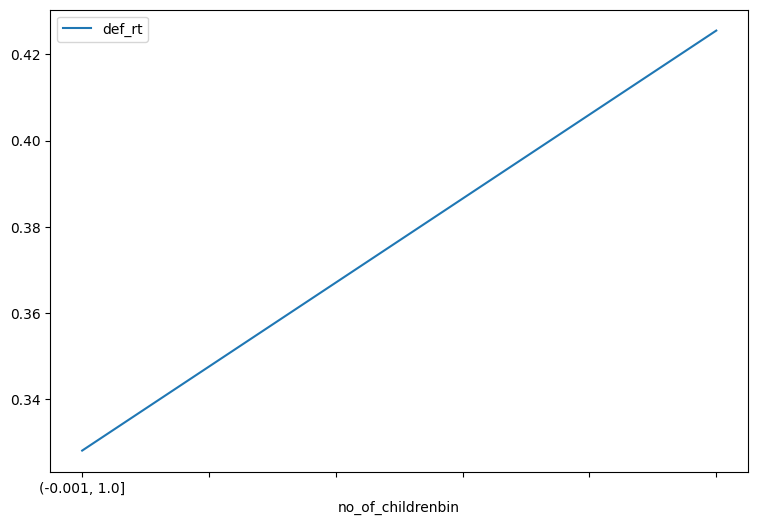

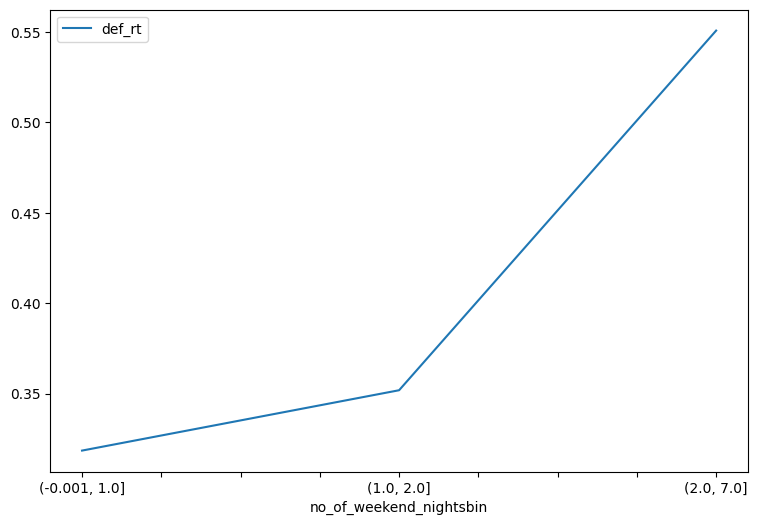

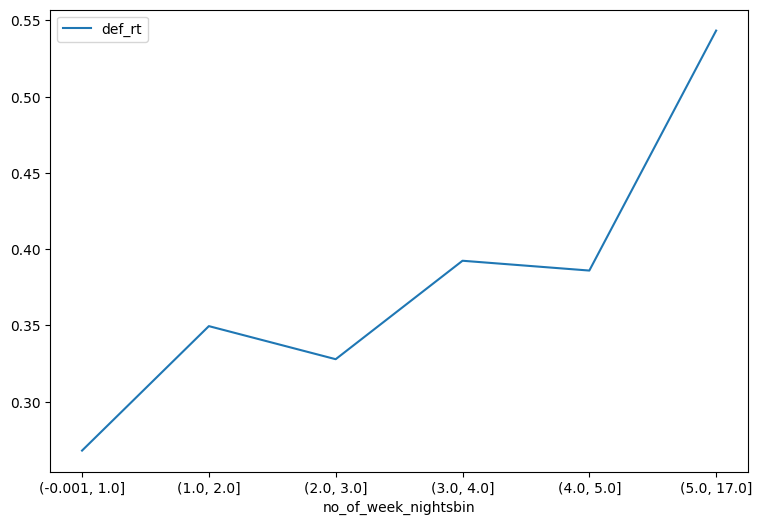

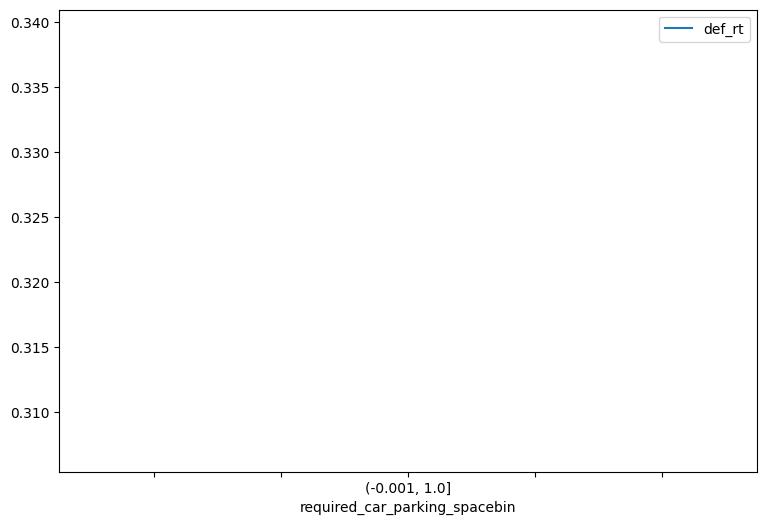

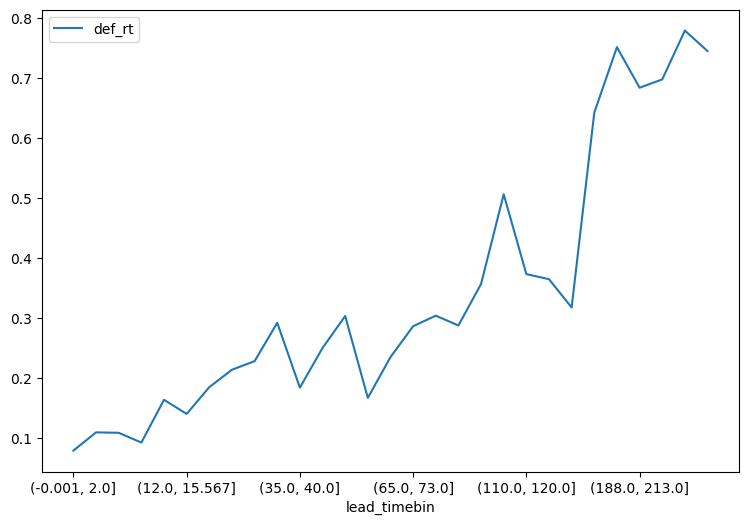

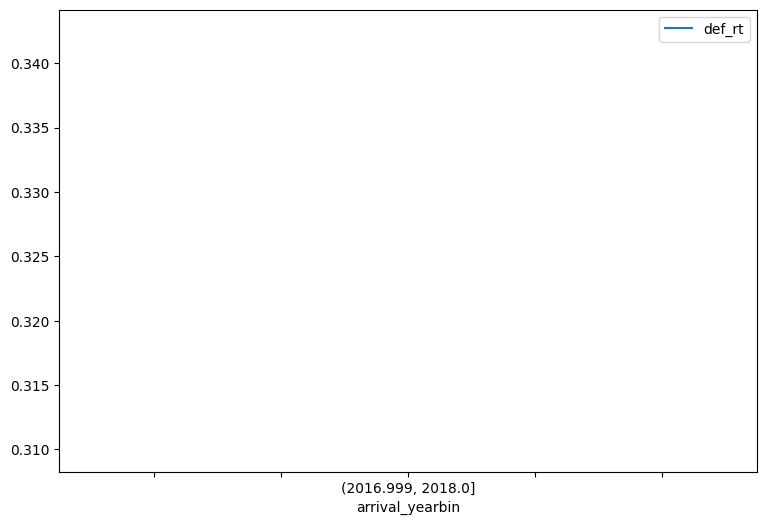

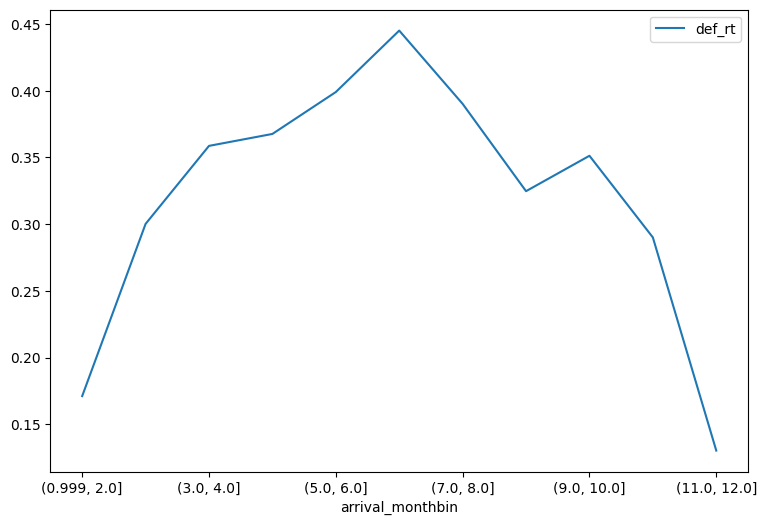

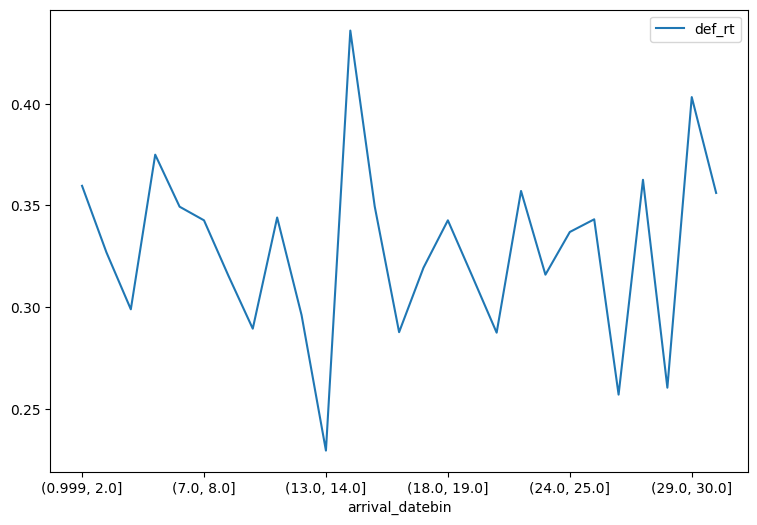

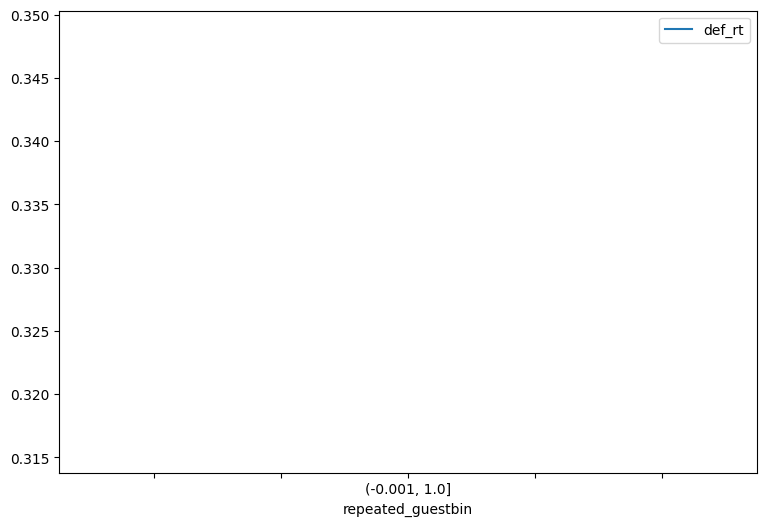

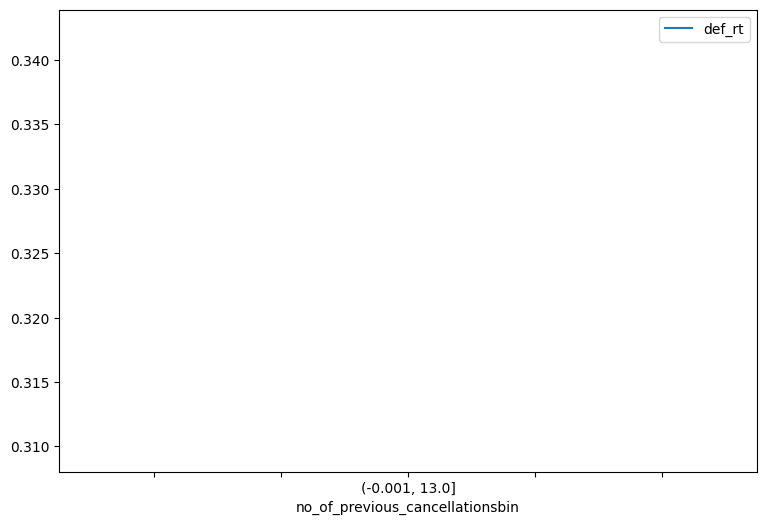

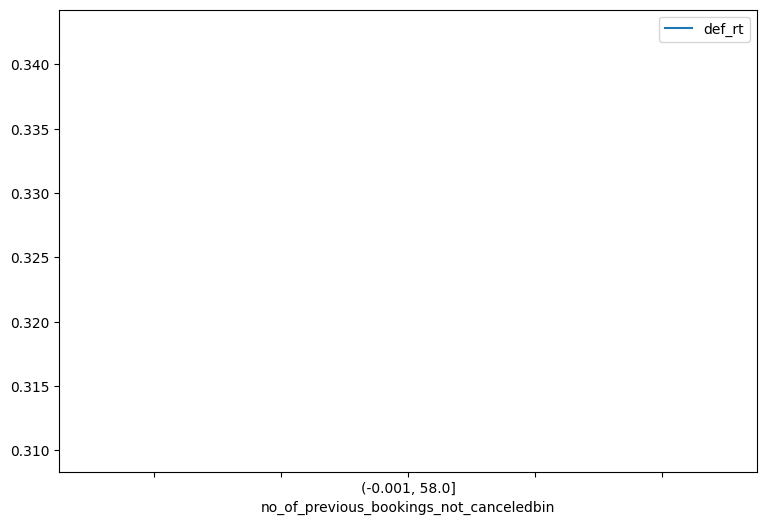

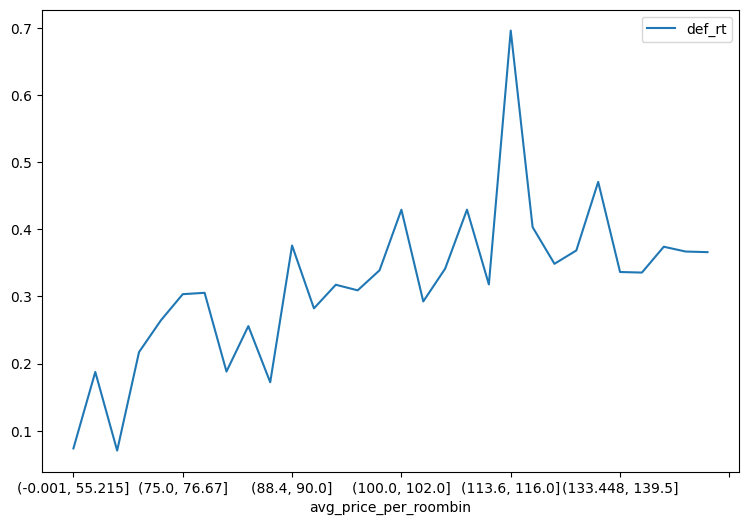

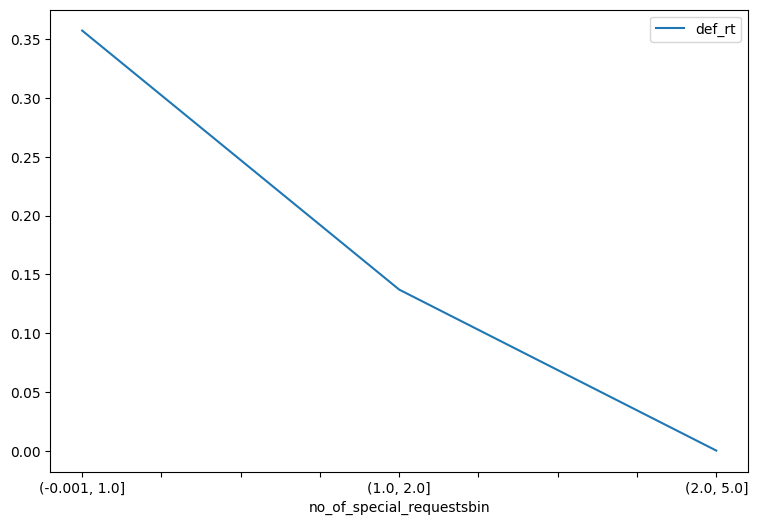

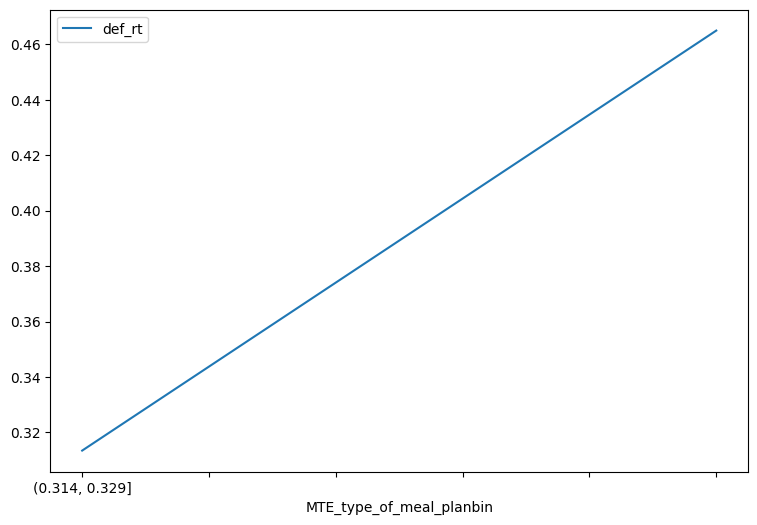

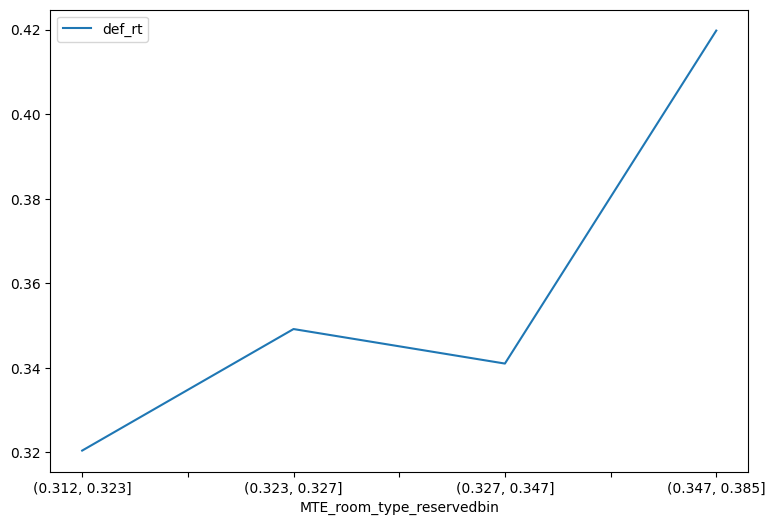

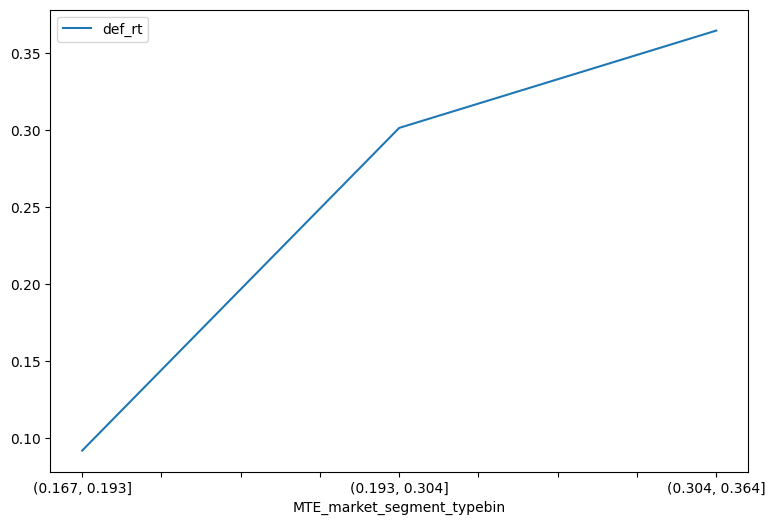

In [66]:
for pred in cols_pred:
    marginal_dependence(data,pred, 30 ,col_target)

In [71]:
positive_monotone_constraint = [
]

negative_monotone_constraint = [
    'no_of_weekend_nights',
    'no_of_week_nights'    
]

constr = []
for col in cols_pred:
    if col in positive_monotone_constraint:
        constr.append('1')
    elif col in negative_monotone_constraint:
        constr.append('-1')
    else:
        constr.append('0')

constr = '(' + ','.join(constr) + ')'
constr

'(0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0)'

In [72]:
# Final model
params = {    
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'monotone_constraints': constr,
    
    'eval_metric': 'auc',
    'objective': 'binary:logistic' ,
    'booster': 'gbtree',
    'tree_method': 'exact',

    'seed': 12
}

evals_result = {}
booster = xgb.train(
    params = params,
    dtrain = xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]),
    num_boost_round = 1000,
    evals = (
        (xgb.DMatrix(data[train_mask][cols_pred], data[train_mask][col_target]), 'train'),
        (xgb.DMatrix(data[test_mask][cols_pred],  data[test_mask][col_target]), 'test'),
        (xgb.DMatrix(data[valid_mask][cols_pred], data[valid_mask][col_target]), 'valid')
    ),
    evals_result = evals_result,
    early_stopping_rounds = 10,
    verbose_eval = True
)

[0]	train-auc:0.68364	test-auc:0.68987	valid-auc:0.67527
[1]	train-auc:0.72491	test-auc:0.72860	valid-auc:0.72095
[2]	train-auc:0.73056	test-auc:0.73324	valid-auc:0.72576
[3]	train-auc:0.73564	test-auc:0.73544	valid-auc:0.73151
[4]	train-auc:0.74499	test-auc:0.74331	valid-auc:0.73818
[5]	train-auc:0.75701	test-auc:0.75677	valid-auc:0.74968
[6]	train-auc:0.76192	test-auc:0.76100	valid-auc:0.75532
[7]	train-auc:0.76773	test-auc:0.76957	valid-auc:0.76208
[8]	train-auc:0.76649	test-auc:0.76817	valid-auc:0.76088
[9]	train-auc:0.76311	test-auc:0.76393	valid-auc:0.75595
[10]	train-auc:0.76371	test-auc:0.76559	valid-auc:0.75635
[11]	train-auc:0.76890	test-auc:0.77088	valid-auc:0.76219
[12]	train-auc:0.76991	test-auc:0.77129	valid-auc:0.76303
[13]	train-auc:0.76882	test-auc:0.77014	valid-auc:0.76192
[14]	train-auc:0.76870	test-auc:0.77093	valid-auc:0.76230
[15]	train-auc:0.77066	test-auc:0.77274	valid-auc:0.76443
[16]	train-auc:0.77362	test-auc:0.77558	valid-auc:0.76704
[17]	train-auc:0.77301	t

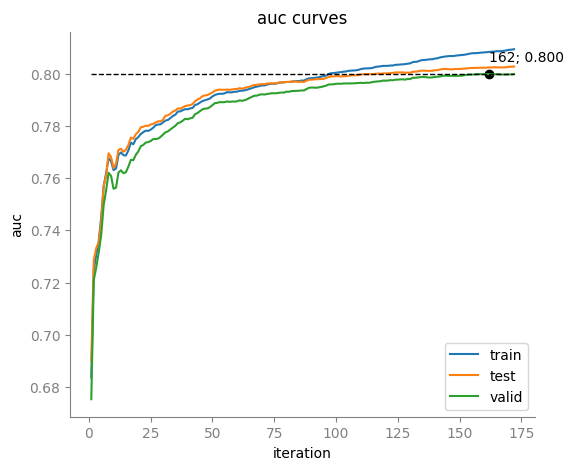

In [73]:
metric = 'auc'

fig = plt.figure(figsize=(6,5))
total_iteration_count = len(evals_result[list(evals_result.keys())[0]][metric])
for sample, vals in evals_result.items():
    plt.plot(
        range(1, total_iteration_count + 1), 
        vals[metric],
        label=sample
    )

best_score = booster.best_score
best_iteration = booster.best_iteration+1

plt.plot([1, total_iteration_count], [best_score, best_score], color='black', ls='--', lw=1)
plt.scatter([best_iteration], [best_score], color = 'black')
plt.annotate(
    '{:d}; {:0.3f}'.format(best_iteration, best_score), 
    xy = (best_iteration, best_score), 
    xytext = (best_iteration,best_score+0.005),
#     textcoords = 'offset points'
)
plt.xlabel('iteration')
plt.ylabel(metric)
plt.legend(loc='best')
plt.title(f'{metric} curves')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

plt.show()

# Model validation

In [74]:
data['predicted_pd'] = booster.predict(xgb.DMatrix(data[cols_pred]), iteration_range=(0,booster.best_iteration))
data['predicted_score'] = np.log(data['predicted_pd'] / (1 - data['predicted_pd']))

C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1543990203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_pd'] = booster.predict(xgb.DMatrix(data[cols_pred]), iteration_range=(0,booster.best_iteration))
C:\Users\ondra\AppData\Local\Temp\ipykernel_272\1543990203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_score'] = np.log(data['predicted_pd'] / (1 - data['predicted_pd']))


In [75]:
data


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,TARGET,sample,MTE_type_of_meal_plan,MTE_room_type_reserved,MTE_market_segment_type,cv_score,predicted_pd,predicted_score
Booking_ID,,,,,,,,,,,,,,,,,,,,,,,,,
INN10204,NaN,NaN,NaN,2.0,Meal Plan 2,NaN,Room_Type 6,NaN,2018.0,9.0,NaN,Online,0.0,0.0,NaN,NaN,1.0,0.0,test,0.429450,0.384501,0.363562,0.702188,0.689367,0.797160
INN20020,NaN,NaN,NaN,2.0,Meal Plan 1,NaN,NaN,NaN,NaN,12.0,NaN,Online,0.0,0.0,0.0,NaN,NaN,0.0,train,0.314747,NaN,0.363562,0.187523,0.156387,-1.685360
INN16435,1.0,NaN,NaN,2.0,NaN,0.0,Room_Type 1,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,0.0,test,NaN,0.323375,NaN,0.242705,0.254016,-1.077308
INN07143,3.0,NaN,NaN,3.0,NaN,NaN,NaN,100.0,2018.0,5.0,NaN,Online,0.0,0.0,NaN,NaN,2.0,0.0,train,NaN,NaN,0.363562,0.132836,0.082072,-2.414519
INN20511,1.0,0.0,1.0,1.0,Meal Plan 1,0.0,NaN,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,0.0,150.0,NaN,1.0,train,0.314747,NaN,NaN,0.213197,0.425826,-0.298902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN16851,2.0,NaN,NaN,NaN,Meal Plan 1,NaN,NaN,43.0,2017.0,12.0,26.0,Offline,NaN,0.0,0.0,NaN,2.0,0.0,test,0.314747,NaN,0.304221,0.001279,0.005801,-5.143993
INN06266,1.0,NaN,NaN,2.0,Meal Plan 2,0.0,Room_Type 1,102.0,2017.0,10.0,NaN,Online,NaN,0.0,NaN,80.0,NaN,1.0,train,0.429450,0.323375,0.363562,0.295076,0.297664,-0.858449
INN11285,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2018.0,5.0,NaN,Corporate,0.0,0.0,0.0,NaN,1.0,0.0,train,NaN,NaN,0.168008,0.141436,0.123114,-1.963264


## Score distribution

In [76]:
def plot_score_calibration(dt, col_score, col_target, n_bins = 25):
    min_score = dt[col_score].min() - 0.1
    max_score = dt[col_score].max() + 0.1
    
    bins = [round(min_score + i * (max_score - min_score) / n_bins, 2) for i in range(n_bins+1)]
    dt = dt.assign(score_bin = pd.cut(dt[col_score], bins = bins, include_lowest = False))
    
    dt_grp = dt.groupby('score_bin', observed=False).agg(
        bad_cnt = (col_target, 'sum'),
        tot_cnt = (col_target, len),
        def_rt = (col_target, 'mean'),
        avg_score = (col_score, 'mean')
    )
    dt_grp['good_cnt'] = dt_grp['tot_cnt'] - dt_grp['bad_cnt']
    dt_grp['bad_cnt_norm'] = dt_grp['bad_cnt'] / dt_grp['tot_cnt']
    dt_grp['good_cnt_norm'] = dt_grp['good_cnt'] / dt_grp['tot_cnt']
    dt_grp['expected_pd'] = 1 / (1 + np.exp(-dt_grp['avg_score']))
    
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    fig.suptitle(col_score)
    plt.subplots_adjust(wspace = 0.4)
    axs[0].bar(range(len(dt_grp)), dt_grp['bad_cnt'], color = 'salmon', label = 'bads')
    axs[0].bar(range(len(dt_grp)), dt_grp['good_cnt'], bottom = dt_grp['bad_cnt'], color = 'lightblue', label = 'goods')
    axs[0].set_ylabel('observations count')
    axs[0].set_xlabel('score')
    axs[0].set_xticks(range(len(dt_grp)))
    axs[0].set_xticklabels(dt_grp.index, rotation = 90)
    
    axs[0].spines['right'].set_color('gray')
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['left'].set_color('gray')
    axs[0].spines['bottom'].set_color('gray')
    axs[0].tick_params(axis='y', colors='gray')
    axs[0].tick_params(axis='x', colors='gray')
    
    ax0l = axs[0].twinx()
    ax0l.plot(range(len(dt_grp)), dt_grp['def_rt'], marker = 'o', color = 'red')
    ax0l.plot(range(len(dt_grp)), dt_grp['expected_pd'], color = 'black', ls = '--')
    ax0l.set_ylabel('default rate', color = 'red')
    
    ax0l.spines['right'].set_color('gray')
    ax0l.spines['top'].set_visible(False)
    ax0l.spines['left'].set_color('gray')
    ax0l.spines['bottom'].set_color('gray')
    ax0l.tick_params(axis='y', colors='gray')
    ax0l.tick_params(axis='x', colors='gray')
    
    axs[1].bar(range(len(dt_grp)), dt_grp['bad_cnt_norm'], color = 'salmon', label = 'bads')
    axs[1].bar(range(len(dt_grp)), dt_grp['good_cnt_norm'], bottom = dt_grp['bad_cnt_norm'], color = 'lightblue', label = 'goods')
    axs[1].set_ylabel('frequency')
    axs[1].set_xlabel('score')
    axs[1].set_xticks(range(len(dt_grp)))
    axs[1].set_xticklabels(dt_grp.index, rotation = 90)
    
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['left'].set_color('gray')
    axs[1].spines['bottom'].set_color('gray')
    axs[1].tick_params(axis='y', colors='gray')
    axs[1].tick_params(axis='x', colors='gray')

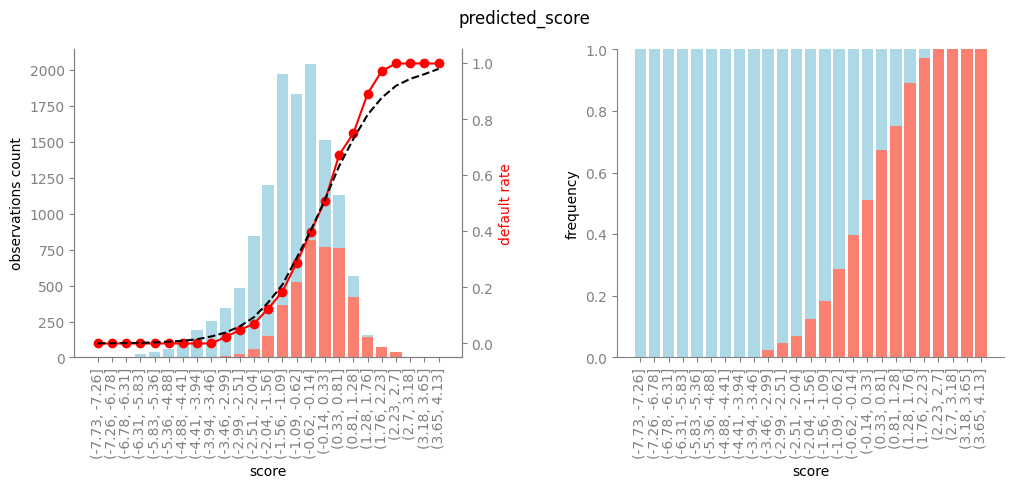

In [77]:
plot_score_calibration(data[valid_mask | test_mask], 'predicted_score', col_target)

## Permutation importance


In [79]:
from sklearn.inspection import permutation_importance

In [80]:
# for sklearn, there is a function
r = permutation_importance(booster_sklearn, data[test_mask][cols_pred], data[test_mask][col_target], n_repeats=6)

In [82]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{cols_pred[i]:<8}    "
              f"{r.importances_mean[i]:.4f}"
              f" +/- {r.importances_std[i]:.4f}")

no_of_special_requests    0.0892 +/- 0.0025
arrival_month    0.0487 +/- 0.0023
arrival_year    0.0379 +/- 0.0017
lead_time    0.0264 +/- 0.0025
MTE_market_segment_type    0.0234 +/- 0.0026
avg_price_per_room    0.0150 +/- 0.0020
no_of_week_nights    0.0136 +/- 0.0015
no_of_adults    0.0119 +/- 0.0021
MTE_type_of_meal_plan    0.0086 +/- 0.0004
repeated_guest    0.0015 +/- 0.0007
MTE_room_type_reserved    0.0013 +/- 0.0004


In [83]:
def permutation_importance(dt, predictor, target, model, n_iters = 10):
    predictors = list(dt.columns)
    predictors.remove(target)
    
    prediction = model.predict(xgb.DMatrix(dt[predictors]), iteration_range=(0,model.best_iteration))
    s = roc_auc_score(dt[target], prediction)
    
    sk = []
    for i in range(n_iters):
        x = dt[predictor].to_list()
        np.random.shuffle(x)
        dt[predictor] = x
        prediction = model.predict(xgb.DMatrix(dt[predictors]), iteration_range=(0,model.best_iteration))
        sk.append(roc_auc_score(dt[target], prediction))
    
    sk_mean = np.mean(sk)
    sk_perc05 = np.percentile(sk, q=5)
    sk_perc95 = np.percentile(sk, q=95)
    
    return s - sk_mean, s - sk_perc05, s - sk_perc95    

In [88]:
res = []
for pred in tqdm(cols_pred):
    pi, iqr95, iqr05 = permutation_importance(
        dt=data[test_mask][cols_pred + [col_target]], 
        predictor=pred,
        target=col_target,
        model=booster,
        n_iters=10
    )
    res.append((pred, pi, iqr05, iqr95))
res = pd.DataFrame(res, columns = ['predictor', 'permutation_importance', 'iqr05', 'iqr95'])
res

  0%|          | 0/17 [00:00<?, ?it/s]

,predictor,permutation_importance,iqr05,iqr95
0,no_of_adults,0.008385,0.007448,0.009566
1,no_of_children,0.000029,-0.000118,0.000166
2,no_of_weekend_nights,0.000328,0.000163,0.000453
3,no_of_week_nights,0.000225,-0.000118,0.000585
4,required_car_parking_space,0.004332,0.003388,0.004883
5,lead_time,0.041824,0.037000,0.046493
6,arrival_year,0.042518,0.037475,0.046372
7,arrival_month,0.068822,0.062874,0.075584
8,arrival_date,-0.000006,-0.000375,0.000289
9,repeated_guest,0.000593,0.000216,0.001094


## Marginal contribution

In [92]:
def fit_model(predictors):
    params={
        'eta': 0.2,
        'max_depth': 3,

        'eval_metric': 'auc',
        'objective': 'binary:logistic' ,
        'booster': 'gbtree',
        'tree_method': 'hist',

        'base_score': 0.08,

        'seed': 12
    }

    evals_result = {}

    booster_mc = xgb.train(
        params = params,
        dtrain = xgb.DMatrix(data[train_mask][predictors], data[train_mask][col_target]),
        num_boost_round = 1000,
        evals = (
            (xgb.DMatrix(data[train_mask][predictors], data[train_mask][col_target]), 'train'),
            (xgb.DMatrix(data[test_mask][predictors], data[test_mask][col_target]), 'test'),
            (xgb.DMatrix(data[valid_mask][predictors], data[valid_mask][col_target]), 'valid')
        ),
        evals_result = evals_result,
        early_stopping_rounds = 20
    )
    
    
    prediction = booster_mc.predict(xgb.DMatrix(data[test_mask][predictors]))
    return roc_auc_score(data[test_mask][col_target], prediction)

prediction = booster.predict(xgb.DMatrix(data[test_mask][cols_pred]), iteration_range=(0,booster.best_iteration))
auc_base = roc_auc_score(data[test_mask][col_target], prediction)

marginal_contribution = []
for pred in tqdm(cols_pred):
    auc = fit_model(predictors=[p for p in cols_pred if p != pred])
    marginal_contribution.append((pred, auc_base - auc))

  0%|          | 0/17 [00:00<?, ?it/s]

[0]	train-auc:0.69151	test-auc:0.69332	valid-auc:0.67947
[1]	train-auc:0.73315	test-auc:0.73472	valid-auc:0.72236
[2]	train-auc:0.74958	test-auc:0.75085	valid-auc:0.74093
[3]	train-auc:0.75559	test-auc:0.75502	valid-auc:0.74635
[4]	train-auc:0.75874	test-auc:0.75768	valid-auc:0.74989
[5]	train-auc:0.76344	test-auc:0.76311	valid-auc:0.75541
[6]	train-auc:0.76807	test-auc:0.76775	valid-auc:0.76044
[7]	train-auc:0.77333	test-auc:0.77303	valid-auc:0.76595
[8]	train-auc:0.77555	test-auc:0.77462	valid-auc:0.76785
[9]	train-auc:0.77644	test-auc:0.77505	valid-auc:0.76899
[10]	train-auc:0.77917	test-auc:0.77826	valid-auc:0.77239
[11]	train-auc:0.77987	test-auc:0.77898	valid-auc:0.77305
[12]	train-auc:0.78067	test-auc:0.78065	valid-auc:0.77416
[13]	train-auc:0.78173	test-auc:0.78174	valid-auc:0.77516
[14]	train-auc:0.78349	test-auc:0.78285	valid-auc:0.77677
[15]	train-auc:0.78436	test-auc:0.78430	valid-auc:0.77832
[16]	train-auc:0.78514	test-auc:0.78497	valid-auc:0.77915
[17]	train-auc:0.78624	t

In [93]:
marginal_contribution = sorted(marginal_contribution, key=lambda x: x[1], reverse=False)

In [94]:
marginal_contribution

[('no_of_children', -0.010429692292218906),
 ('no_of_previous_cancellations', -0.010042363561810763),
 ('arrival_date', -0.009415420424917498),
 ('MTE_room_type_reserved', -0.009235267527053392),
 ('no_of_weekend_nights', -0.008724539587770308),
 ('no_of_previous_bookings_not_canceled', -0.007872460590172103),
 ('repeated_guest', -0.007810733354922217),
 ('required_car_parking_space', -0.007721983184992731),
 ('no_of_week_nights', -0.004809916588102925),
 ('no_of_adults', -0.0043475425707929505),
 ('MTE_type_of_meal_plan', -0.004311069898218944),
 ('avg_price_per_room', -0.003972260874658851),
 ('MTE_market_segment_type', 0.003335757476621626),
 ('lead_time', 0.003911473087035988),
 ('arrival_year', 0.014101993065771312),
 ('arrival_month', 0.019025140723728295),
 ('no_of_special_requests', 0.06534753483416533)]

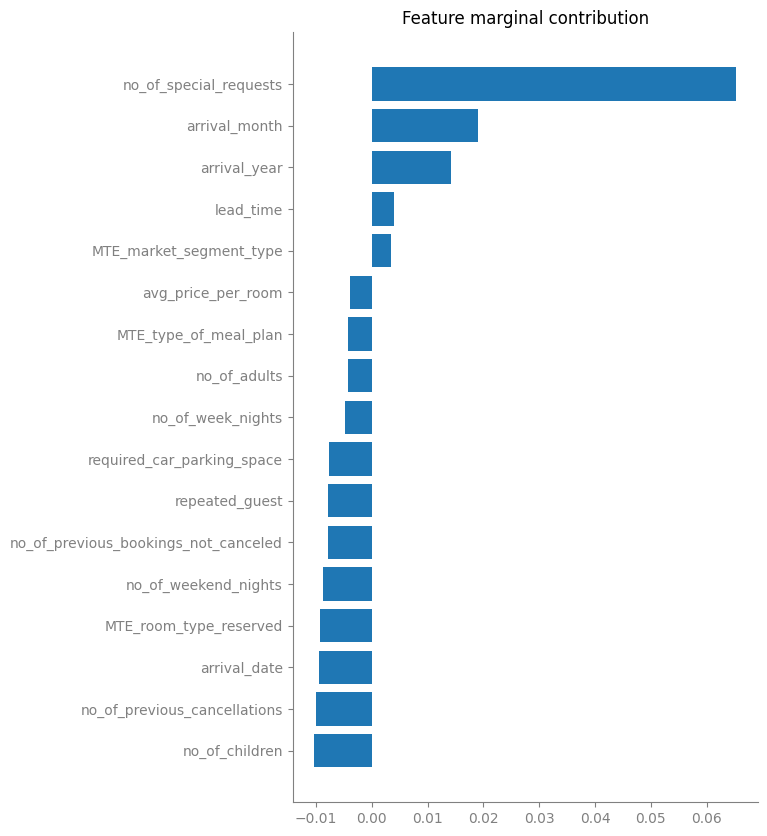

In [95]:
# feature_perm_importance = sorted(zip(cols_pred, pi['importances_mean']), key=lambda x: x[1], reverse=False)

plt.figure(figsize=(6,10))
ax = plt.subplot(1,1,1)
ax.barh(range(len(marginal_contribution)), [imp for p, imp in marginal_contribution])
ax.set_yticks(range(len(marginal_contribution)))
ax.set_yticklabels([p for p, imp in marginal_contribution])

ax.set_title('Feature marginal contribution')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.show()

In [115]:
for pred in cols_pred:
    print(data[pred].value_counts(dropna=False))

no_of_adults
2.0    20144
1.0     5888
NaN     4384
3.0     1758
0.0      110
4.0       11
Name: count, dtype: int64
no_of_children
NaN    27307
0.0     4621
1.0      226
2.0      136
3.0        4
9.0        1
Name: count, dtype: int64
no_of_weekend_nights
NaN    24645
0.0     3581
1.0     2090
2.0     1910
4.0       31
3.0       25
5.0        8
6.0        4
7.0        1
Name: count, dtype: int64
no_of_week_nights
NaN     8276
2.0     7485
1.0     6375
3.0     5189
4.0     1965
0.0     1561
5.0     1109
6.0      124
7.0       78
10.0      39
8.0       38
9.0       25
11.0       7
12.0       6
15.0       5
13.0       4
14.0       4
17.0       3
16.0       2
Name: count, dtype: int64
required_car_parking_space
0.0    17077
NaN    14621
1.0      597
Name: count, dtype: int64
lead_time
NaN      25443
0.0        235
1.0        214
3.0        126
2.0        110
         ...  
350.0        1
235.0        1
351.0        1
236.0        1
283.0        1
Name: count, Length: 328, dtype: int64
arr

In [114]:
print(data.no_of_previous_cancellations.value_counts(dropna=False))
data.no_of_previous_bookings_not_canceled.value_counts(dropna=False)
value_counts(data[no_of_previous_cancellations],dropna=False)

no_of_previous_cancellations
0.0     31919
1.0       182
NaN        69
2.0        42
3.0        37
11.0       22
5.0        10
4.0         9
13.0        4
6.0         1
Name: count, dtype: int64


NameError: name 'value_counts' is not defined

## PDP plots


In [100]:
def partial_dependency(bst, X, y, feature_names, feature_ids = [], f_id = -1):

    """
    Calculate the dependency (or partial dependency) of a response variable on a predictor (or multiple predictors)
    1. Sample a grid of values of a predictor.
    2. For each value, replace every row of that predictor with this value, calculate the average prediction.
    """
    X_temp = X.copy()
    grid = np.linspace(
        np.percentile(X_temp[:, f_id], 0.1),
        np.percentile(X_temp[:, f_id], 99.5),
        50
    )
    y_pred = np.zeros(len(grid))

    if len(feature_ids) == 0 or f_id == -1:
        print ('Input error!')
        return
    else:
        for i, val in enumerate(grid):

            X_temp[:, f_id] = val
            data = xgb.DMatrix(X_temp, feature_names = feature_names)

            y_pred[i] = np.average(bst.predict(data))

    return grid, y_pred

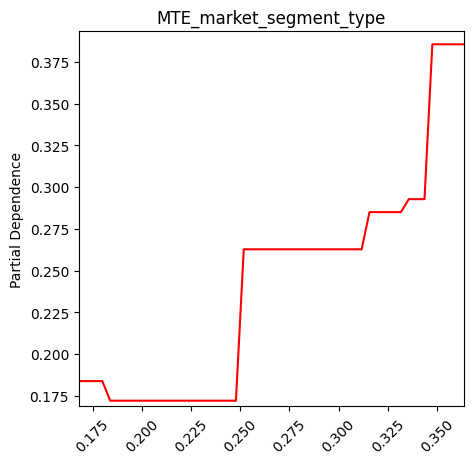

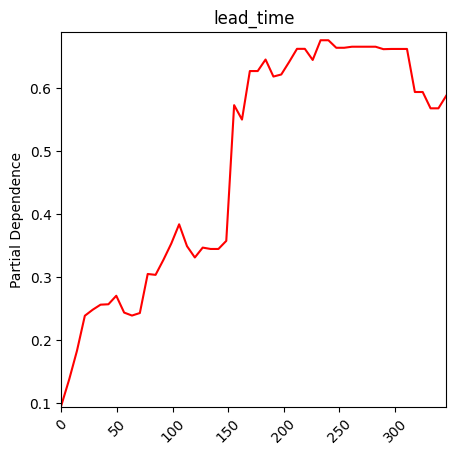

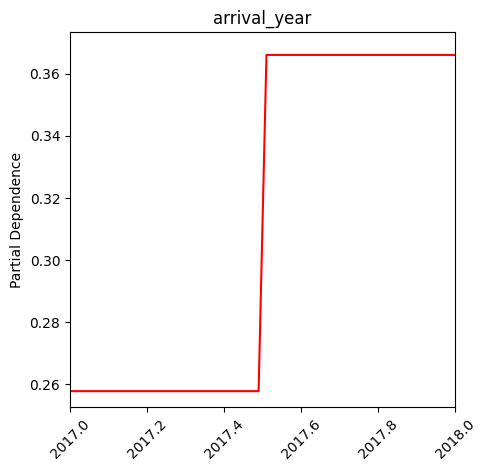

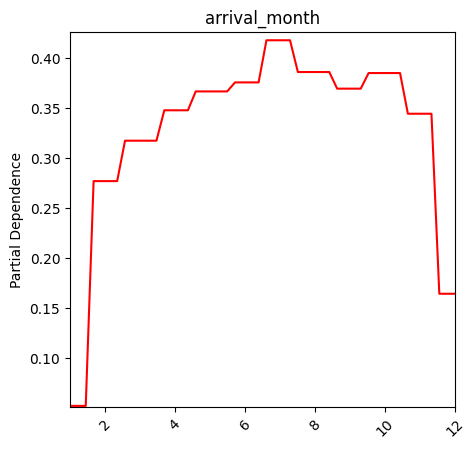

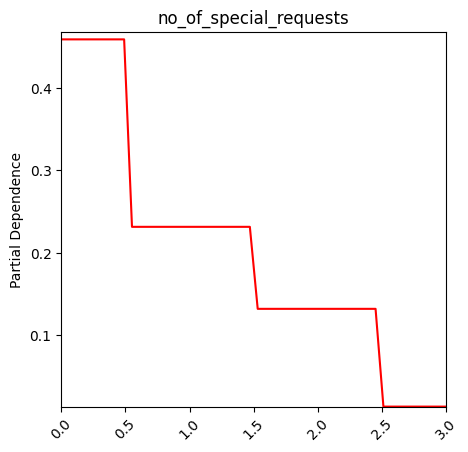

In [101]:
lst_f = ['MTE_market_segment_type',
'lead_time',
'arrival_year',
'arrival_month',
'no_of_special_requests',
        ]
# cols_pred
sampled_data = data.sample(frac=0.1, random_state=22)
for f in lst_f:
    f_id = cols_pred.index(f)
    feature_ids = range(len(cols_pred))

    mask = sampled_data[f].notnull()
    grid, y_pred = partial_dependency(
        booster,
        sampled_data[mask][cols_pred].values,
        sampled_data[mask][col_target].values,
        feature_names = cols_pred,
        feature_ids = feature_ids,
        f_id = f_id
    )

    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)
    plt.subplots_adjust(left = 0.17, right = 0.94, bottom = 0.15, top = 0.9)

    ax.plot(grid, y_pred, ls = '-', color = 'red', linewidth = 1.5, label='fit')

    ax.set_xlim(min(grid), max(grid))
    ax.set_ylim(0.98 * min(y_pred), 1.02 * max(y_pred))

    ax.set_title(f)
    ax.set_ylabel('Partial Dependence')
    plt.xticks(rotation=45)

    plt.show()

## ICE plots


In [102]:
def ice_data(bst, dt, predictor, n_points=20):
    X = dt.copy()
    grid = np.linspace(
        dt[predictor].quantile(0.01),
        dt[predictor].quantile(0.99),
        n_points
    )
    
    y_pred = np.zeros((len(dt), len(grid)))

    if len(feature_ids) == 0 or f_id == -1:
        print ('Input error!')
        return
    else:
        for i, val in enumerate(grid):
            X[predictor] = val
            data = xgb.DMatrix(X, feature_names = X.columns.to_list())

            y_pred[:,i] = bst.predict(data)
    return grid, y_pred

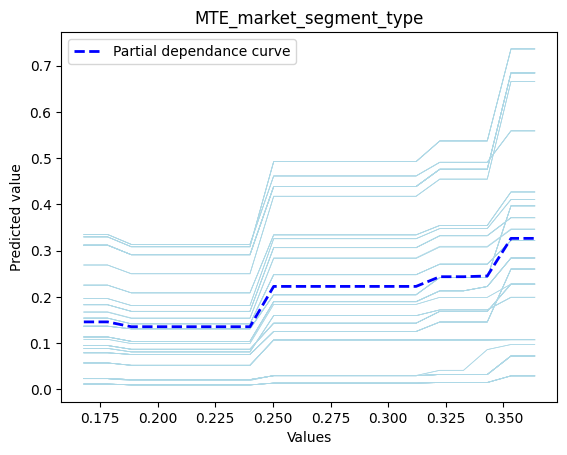

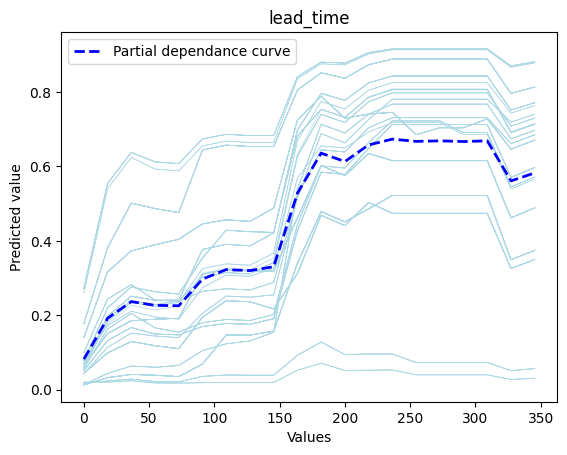

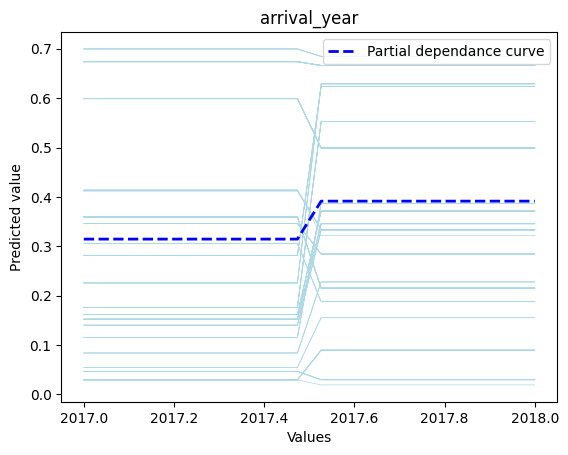

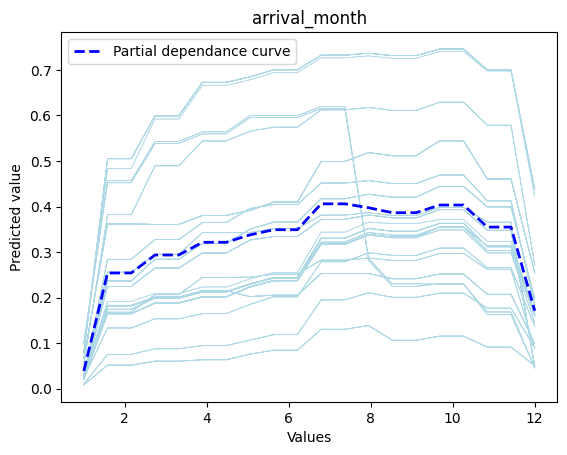

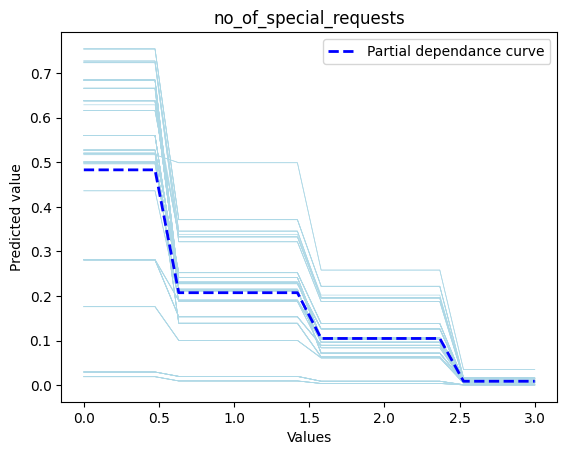

In [103]:
n_plots = 100
cols_to_plot = ['MTE_market_segment_type',
'lead_time',
'arrival_year',
'arrival_month',
'no_of_special_requests',
        ]

sampled_data = data.sample(n=10000, random_state=22)

for pred in cols_to_plot:
    x, ice_data_plot = ice_data(booster, sampled_data[cols_pred], pred)

    idx = np.random.randint(len(x), size=n_plots)
    plt.plot(x, np.transpose(ice_data_plot[idx,:]), lw = 0.5, color = 'lightblue')
    plt.plot(x, np.average(ice_data_plot[idx,:], axis = 0), lw = 2, ls = '--', color = 'blue', label = 'Partial dependance curve')
    plt.title(pred)
    plt.ylabel('Predicted value')
    plt.xlabel('Values')
    plt.legend(loc='best')
    plt.show()

## SHAP


In [104]:
import shap
shap.initjs()

In [105]:
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(data[cols_pred])

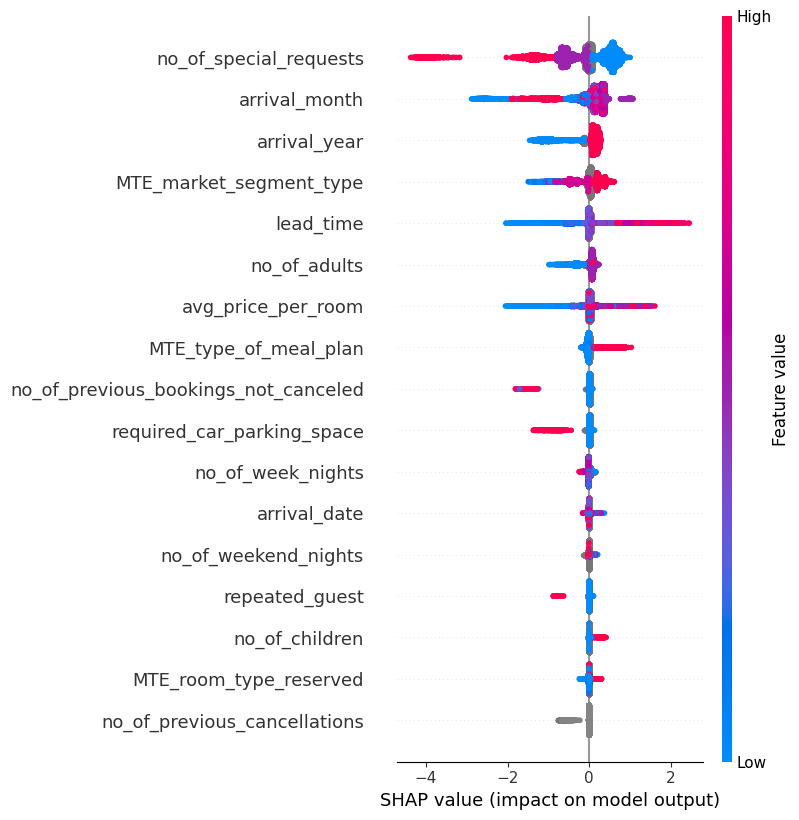

In [106]:
plt.figure()
shap.summary_plot(shap_values, data[cols_pred], max_display=20, show=True)
plt.show()

In [107]:
shap.force_plot(explainer.expected_value, shap_values[0,:], data[cols_pred].iloc[0,:])

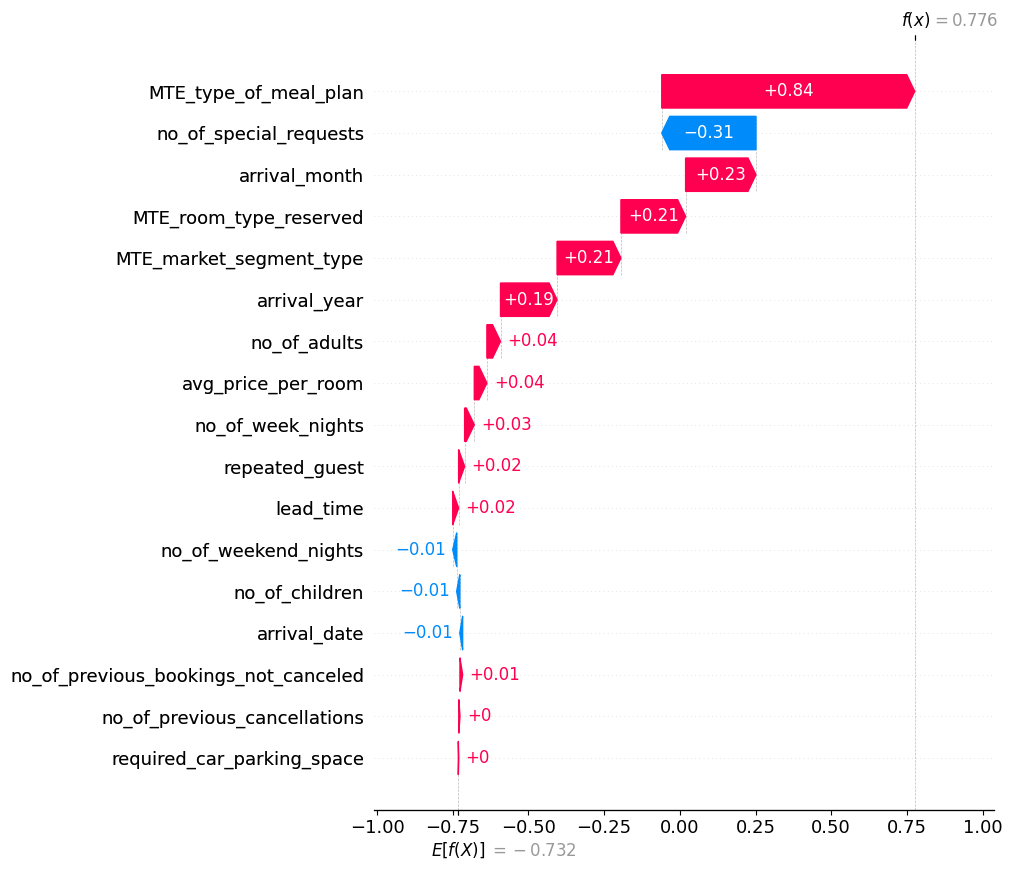

In [108]:
shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value, 
    shap_values=shap_values[0, :], 
    feature_names=cols_pred, 
    max_display=20
)

In [109]:
Xd = xgb.DMatrix(data[train_mask][cols_pred].iloc[:1000], data[train_mask][col_target].iloc[:1000])

explainer = shap.TreeExplainer(booster)
shap_interaction_values = explainer.shap_interaction_values(Xd)

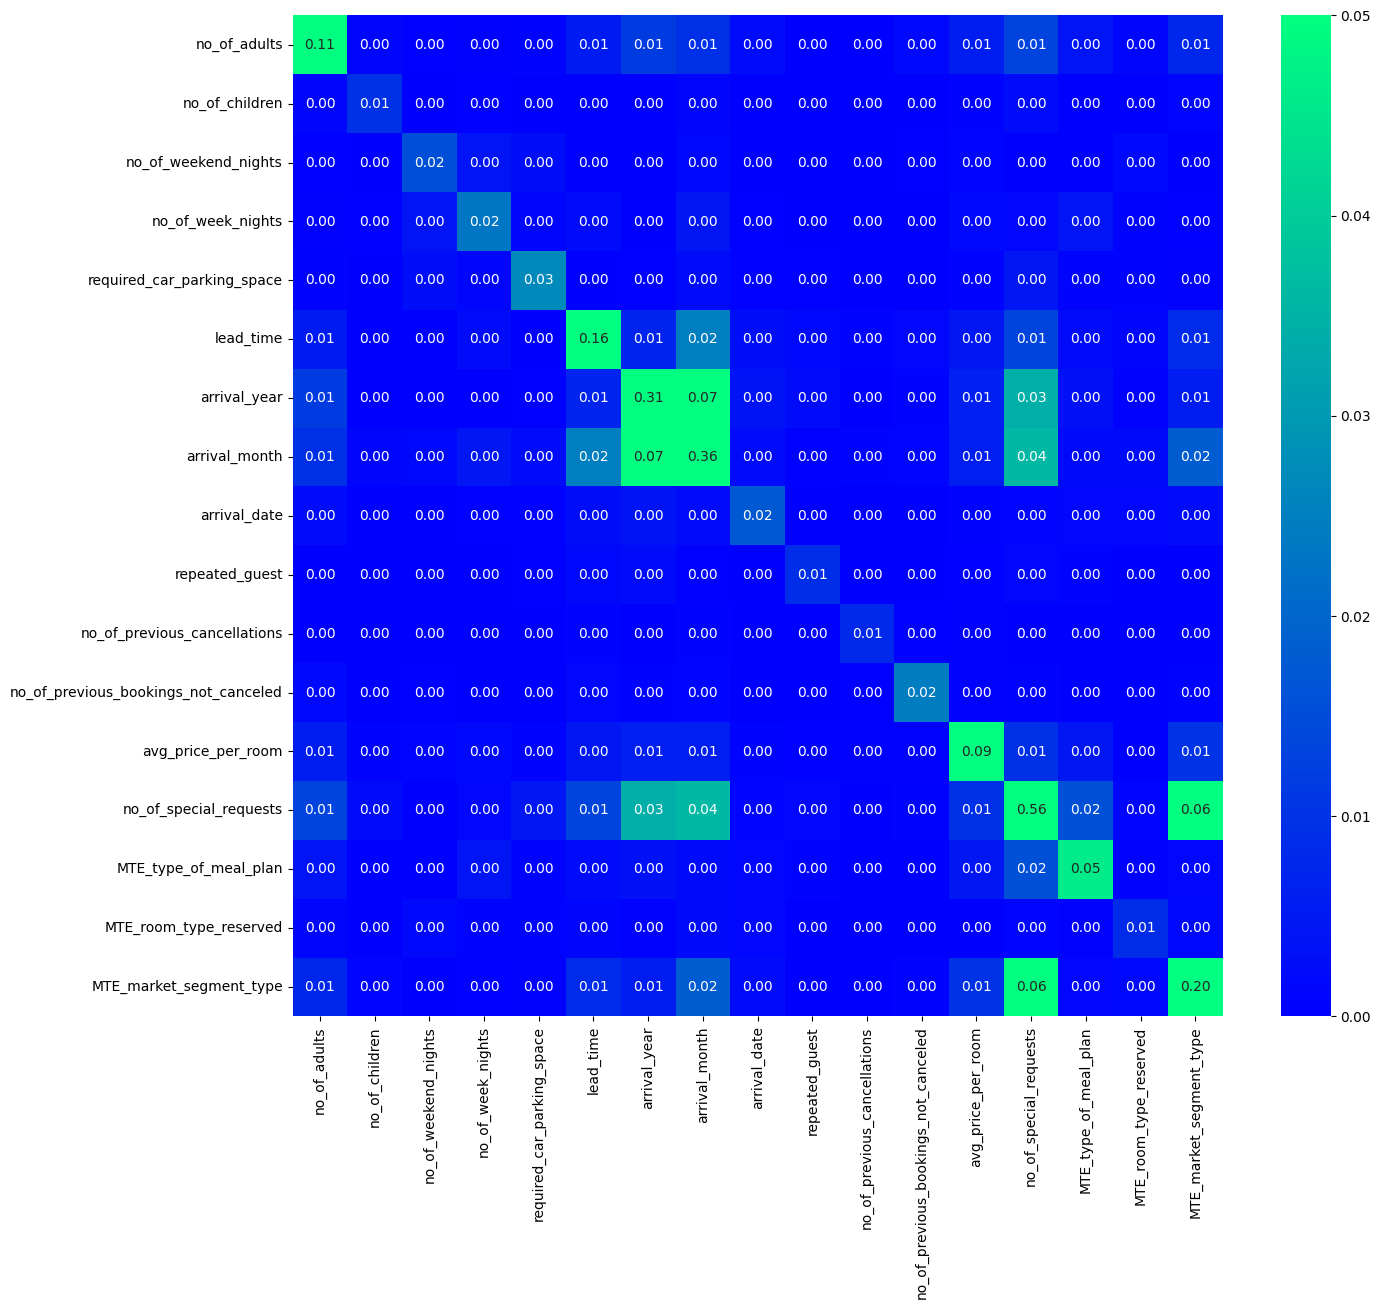

In [110]:
plt.figure(figsize=(15,13))

sns.heatmap(
    data=np.mean(abs(shap_interaction_values[:, 0:20, 0:20]), axis=0), 
    annot=True, 
    fmt='.2f', 
    xticklabels=cols_pred[0:20], 
    yticklabels=cols_pred[0:20],
    cmap='winter',
    vmax=0.05
)

plt.show()

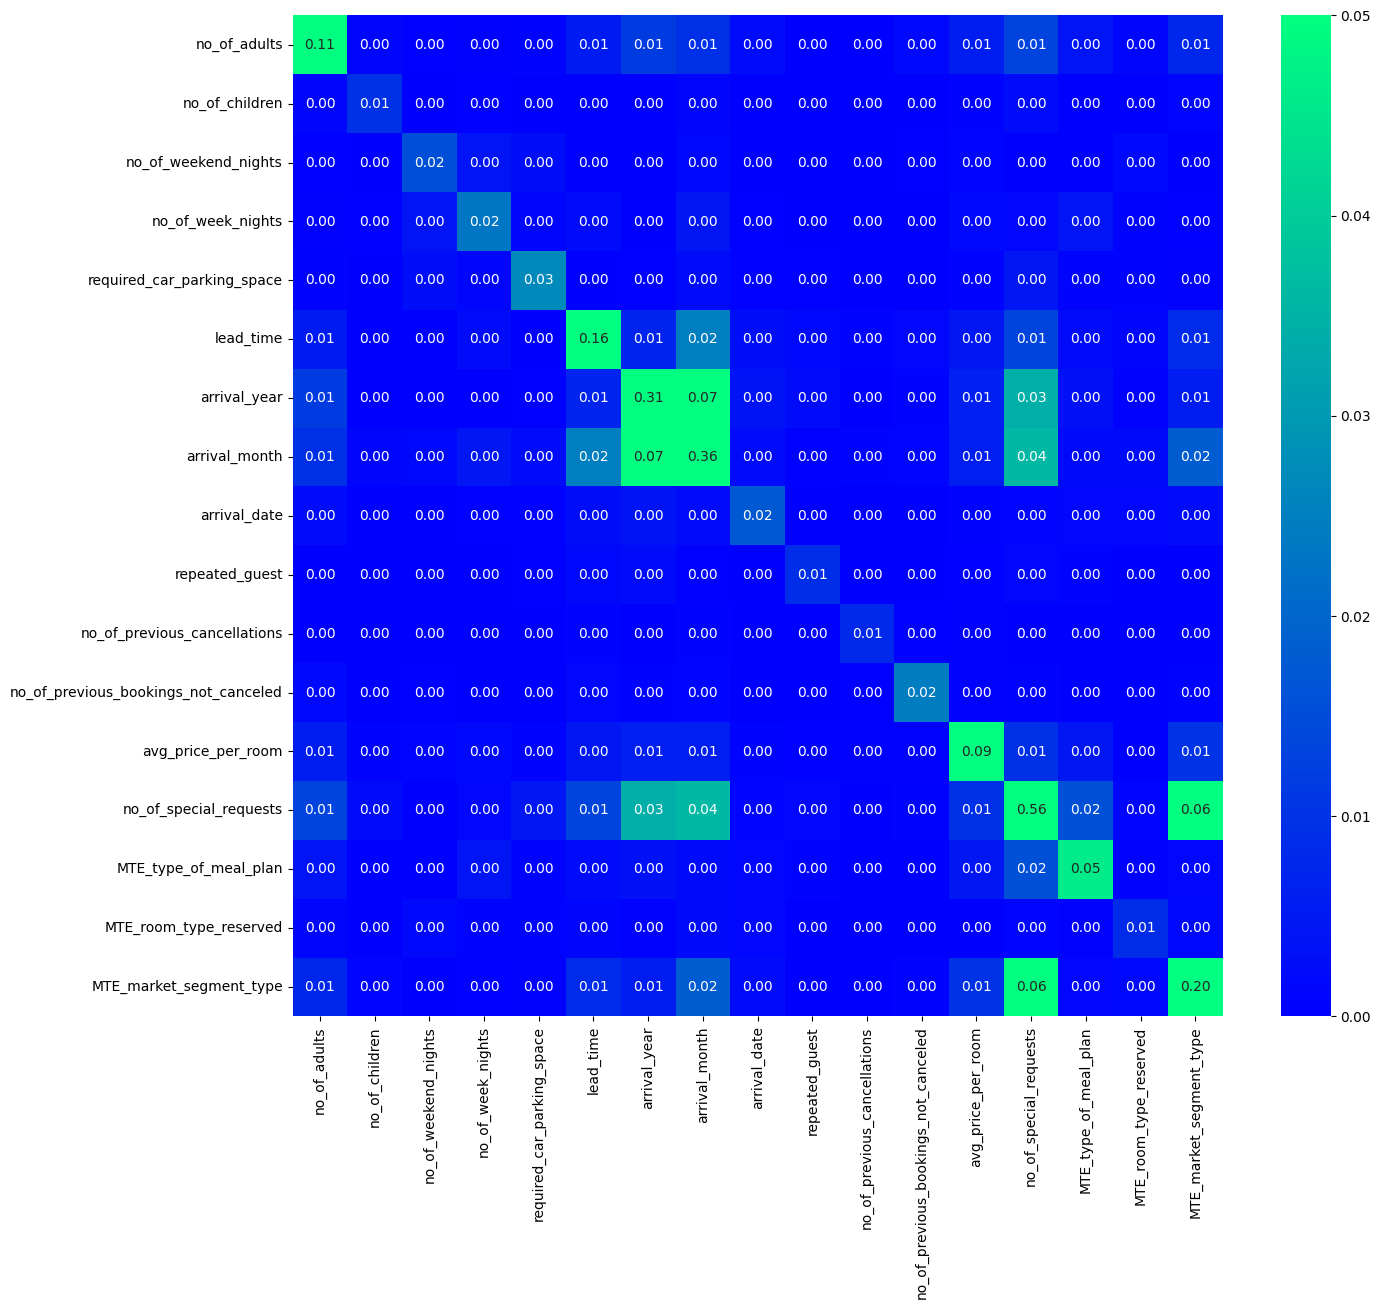

In [112]:
n_observations = 10000

dt_shap = data.iloc[0:n_observations]
dt_shap = dt_shap[cols_pred]
shap.dependence_plot('AMT_GOODS_PRICE', shap_values[:n_observations], dt_shap, interaction_index = 'AMT_CREDIT')

ValueError: Could not find feature named: AMT_GOODS_PRICE